<a href="https://colab.research.google.com/github/Henrique-zan/Data-Science-Project/blob/main/Projeto_data_science_grupo10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Report - Data Science
## Bachelor's Degree in Computer Science / PUCPR

**Prof. Jean Paul Barddal** / **Prof. Rayson Laroca**

`Henrique Zan Grande` - `henrique.grande@pucpr.edu.br`

`João Gabriel Pitol` - `joao.pitol@pucpr.edu.br`

`Lucas Braga Schuck` - `lucas.schuck@pucpr.edu.br`

`Rafael Vargas Serenato` - `rafael.serenato@pucpr.edu.br`

`2025`

# Import the libs you need

In [ ]:
# Import all packages you need here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, norm, expon, uniform
#usadas na tentativa do PCA que o professor pediu pra entregar comentado
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your data

In [ ]:
# mostra todas as colunas quando seleciona a tabela
pd.set_option('display.max_columns', None)

df = pd.read_csv("https://raw.githubusercontent.com/Henrique-zan/Data-Science-Project/refs/heads/main/alzheimers_disease_data.csv")
#copia do data set, com as variaveis categoricas em binario, antes da legenda ser feita para calcular correlação de todas as features
df_binario = df.copy()

In [ ]:
# Tabela 'Crua'
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [ ]:
# Remover a coluna 'PatientID' e 'DoctorInCharge'
df = df.drop(columns=['PatientID', 'DoctorInCharge'])

In [ ]:
# Fazer legenda para as variaveis categoricas (map)

# Map da coluna de genero
map_Gender = {0: 'Masculine', 1: 'Feminine'}
df['Gender'] = df['Gender'].map(map_Gender)

# Map da coluna de genero
map_Ethnicity = {0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'}
df['Ethnicity'] = df['Ethnicity'].map(map_Ethnicity)

# Map da coluna de genero
map_EducationLevel = {0: 'None', 1: 'High School', 2: 'Bachelors', 3: 'Higher'}
df['EducationLevel'] = df['EducationLevel'].map(map_EducationLevel)

# Map da coluna de genero
map_YesOrNo = {0: 'No', 1: 'Yes'}
#lifestyle
df['Smoking'] = df['Smoking'].map(map_YesOrNo)
df['FamilyHistoryAlzheimers'] = df['FamilyHistoryAlzheimers'].map(map_YesOrNo)
#historico medico
df['CardiovascularDisease'] = df['CardiovascularDisease'].map(map_YesOrNo)
df['Diabetes'] = df['Diabetes'].map(map_YesOrNo)
df['Depression'] = df['Depression'].map(map_YesOrNo)
df['HeadInjury'] = df['HeadInjury'].map(map_YesOrNo)
df['Hypertension'] = df['Hypertension'].map(map_YesOrNo)
#avaliação sobre cognição e funcionalidade
df['MemoryComplaints'] = df['MemoryComplaints'].map(map_YesOrNo)
df['BehavioralProblems'] = df['BehavioralProblems'].map(map_YesOrNo)
#sintomas
df['Confusion'] = df['Confusion'].map(map_YesOrNo)
df['Disorientation'] = df['Disorientation'].map(map_YesOrNo)
df['PersonalityChanges'] = df['PersonalityChanges'].map(map_YesOrNo)
df['DifficultyCompletingTasks'] = df['DifficultyCompletingTasks'].map(map_YesOrNo)
df['Forgetfulness'] = df['Forgetfulness'].map(map_YesOrNo)
# Map da coluna de genero
map_Diagnosis = {0:'negative', 1:'positive'}
df['Diagnosis'] = df['Diagnosis'].map(map_Diagnosis)

In [ ]:
# Tabela 'Limpa' sem as colunas removidas acima e com a legenda feita
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,Masculine,Caucasian,Bachelors,22.927749,No,13.297218,6.327112,1.347214,9.025679,No,No,Yes,Yes,No,No,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,No,No,1.725883,No,No,No,Yes,No,negative
1,89,Masculine,Caucasian,None,26.827681,No,4.542524,7.619885,0.518767,7.151293,No,No,No,No,No,No,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,No,No,2.592424,No,No,No,No,Yes,negative
2,73,Masculine,Other,High School,17.795882,No,19.555085,7.844988,1.826335,9.673574,Yes,No,No,No,No,No,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,No,No,7.119548,No,Yes,No,Yes,No,negative
3,74,Feminine,Caucasian,High School,33.800817,Yes,12.209266,8.428001,7.435604,8.392554,No,No,No,No,No,No,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,No,Yes,6.481226,No,No,No,No,No,negative
4,89,Masculine,Caucasian,None,20.716974,No,18.454356,6.310461,0.795498,5.597238,No,No,No,No,No,No,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,No,No,0.014691,No,No,Yes,Yes,No,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,Masculine,Caucasian,High School,39.121757,No,1.561126,4.049964,6.555306,7.535540,No,No,No,No,No,No,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,No,No,4.492838,Yes,No,No,No,No,positive
2145,75,Masculine,Caucasian,Bachelors,17.857903,No,18.767261,1.360667,2.904662,8.555256,No,No,No,No,No,No,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,No,Yes,9.204952,No,No,No,No,No,positive
2146,77,Masculine,Caucasian,High School,15.476479,No,4.594670,9.886002,8.120025,5.769464,No,No,No,No,No,No,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,No,No,5.036334,No,No,No,No,No,positive
2147,78,Feminine,Other,High School,15.299911,No,8.674505,6.354282,1.263427,8.322874,No,Yes,No,No,No,No,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,No,No,3.785399,No,No,No,No,Yes,positive


# Statistical Description

**O data set representa um conjunto de informações sobre a saúde de 2149 pacientes idosos que estão separados em duas categorias, os que tem diagnósticos positivos para Alzheimer e os que tem diagnósticos negativos,  o nome do data set é Alzheimers Disease Dataset e foi encontrado no kaggle, abaixo mostramos a estrutura da tabela junto com uma visão geral das variaveis:**

In [ ]:
# fromato da tabela, numero de instancias X numero de atributos
df.shape

(2149, 33)

In [ ]:
# infromações sobre a tabela, nomes das colunas, presença ou não de valores nulos e tipos de dados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   object 
 2   Ethnicity                  2149 non-null   object 
 3   EducationLevel             2149 non-null   object 
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   object 
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   object 
 11  CardiovascularDisease      2149 non-null   object 
 12  Diabetes                   2149 non-null   object 
 13  Depression                 2149 non-null   objec

In [ ]:
# Describe do dataset limpo, mostrando dados importantes relacionados as variaveis numéricas.
df.describe()

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,27.655697,10.039442,4.920202,4.993138,7.051081,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,4.982958
std,8.990221,7.217438,5.757910,2.857191,2.909055,1.763573,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,2.949775
min,60.000000,15.008851,0.002003,0.003616,0.009385,4.002629,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.001288
25%,67.000000,21.611408,5.139810,2.570626,2.458455,5.482997,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,2.342836
50%,75.000000,27.823924,9.934412,4.766424,5.076087,7.115646,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,5.038973
75%,83.000000,33.869778,15.157931,7.427899,7.558625,8.562521,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,7.581490
max,90.000000,39.992767,19.989293,9.987429,9.998346,9.999840,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,9.999747


**Como nosso problema é um problema de classificação, nossa variavél target é a 'Diagnosis' que indica a presença ou não da doença Alzheimer, possui 2 classes 0 / negative e 1 / positive, a seguir mostraremos a distribuição dela:**

In [ ]:
# Number of classes e Class distribution seria mostrar a distribuição da target diagnostico
counts = df['Diagnosis'].value_counts()
percentages = df['Diagnosis'].value_counts(normalize=True) * 100

summary = pd.DataFrame({
    'Contagem': counts,
    'Porcentagem (%)': percentages.round(2)
})
summary

,Contagem,Porcentagem (%)
Diagnosis,,
negative,1389,64.63
positive,760,35.37


<Axes: xlabel='Diagnosis', ylabel='count'>

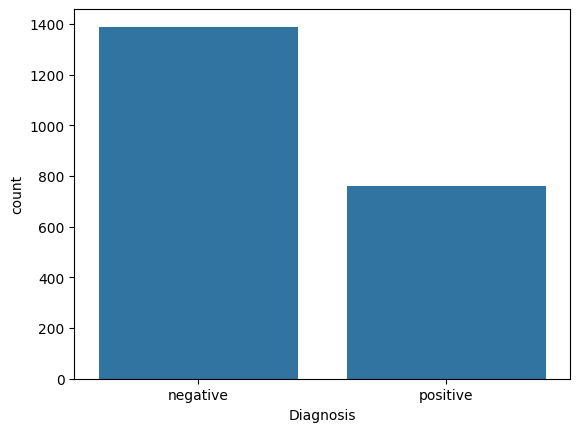

In [ ]:
# Grafico da distribuição de registros do nosso target (diagnostico positivo ou negativo de alzheimer)
sns.countplot(x=df['Diagnosis'])

## **Descrição textual das variaveis de interesse principal.**

## Algumas informações desta seção podem se repetir mais a baixo onde escrevemos sobre as variaveis principais que usaremos na analise multivariada, vale ressaltar que após a analise univariada podem ser incluidas ideias que não estão presentes nesta seção.

A seguir, descrevemos as principais variáveis que julgamos que serão importantes:

**Idade (Age):**
Representa a idade do paciente mostrada em anos. A idade é um dos principais fatores de risco para diversas condições de saúde, incluindo doenças cardiovasculares, declínio cognitivo e síndromes presentes em pessoas idosas. E é frequentemente utilizada como variável de controle em estudos clínicos.

**Gênero (Gender):**
Esta variável indica o sexo biológico do individuo, categorizado como masculino ou feminino. O gênero é uma variável demográfica fundamental, pois diversas condições de saúde apresentam diferenças significativas entre homens e mulheres. Por exemplo, fatores hormonais, comportamentais e sociais podem influenciar o risco de doenças, desempenho cognitivo e até a resposta a tratamentos.

**Consumo de Álcool (AlcoholConsumption):**
Refere-se ao nível e frequência do consumo de bebidas alcoólicas. O consumo excessivo pode estar associado a efeitos adversos ligados a déficits cognitivos, enquanto níveis moderados podem ter efeitos controversos na saúde. Essa variável pode nos ajudar a entender se fatores comportamentais e de estilo de vida tem alguma influencia no diagnóstico.

**Tabagismo (Smoking):**
Indica se o indivíduo é fumante, ou não. O tabagismo é amplamente reconhecido como um fator de risco para uma série de doenças crônicas, incluindo câncer, doenças respiratórias, cardiovasculares e pode tambem acabar causando comprometimento cognitivo. A presença desse hábito pode potencializar riscos e afetar negativamente diversos indicadores clínicos e funcionais.

**MMSE (Mini-Exame do Estado Mental):**
O MMSE é um instrumento padronizado utilizado na avaliação do desempenho cognitivo global. O Score do MMSE auxilia na separação de déficits cognitivos leves a severos, sendo um dos principais indicadores utilizados em estudos sobre demência, Alzheimer e outras doenças neurodegenerativas.

**Avaliação Funcional (FunctionalAssessment):**
Esta variável mede a capacidade do indivíduo de realizar atividades cotidianas que requerem planejamento, coordenação e força física. Mostra o nível de independência e funcionalidade geral, sendo uma métrica importante para identificar estágios de fragilidade ou perda de autonomia.

**Queixas de Memória (MemoryComplaints):**
Representa relatos de problemas de memória, frequentemente utilizados como indicadores iniciais de comprometimento cognitivo leve. Essa variável pode ser considerada um preditor de risco para progressão a quadros mais graves de doenças cognitivas.

**Problemas Comportamentais (BehavioralProblems):**
Envolve alterações emocionais ou comportamentais, como agitação, agressividade, depressão ou apatia. Esses sintomas podem estar associados a condições neuropsiquiátricas ou neurológicas e impactam diretamente a qualidade de vida e o cuidado com o paciente. A detecção desses problemas pode auxiliar em intervenções mais eficazes.

**Atividades de Vida Diária (ADL – Activities of Daily Living):**
Refere-se à capacidade do indivíduo em realizar tarefas básicas de autocuidado, como alimentação, banho, vestimenta e locomoção. É um indicador essencial do grau de independência funcional e frequentemente utilizado para avaliar a progressão de doenças crônicas, síndromes geriátricas e comprometimento neurológico.

**Diagnóstico (Diagnosis):**
Representa a condição clínica do paciente em relação ao desenvolvimento da doença, podendo ser categorizada como positivo ou negativo. Esta é a variável target central na análise, pois define o grupo ao qual o paciente pertence em relação à presença do alzheimer.

# Univariate data analysis

**Esta seção esta organizada da seguinte maneira:**

Aqui os plots das analises univariadas, demonstrando a distribuição e frequencia das 33 variaveis, estão disponiveis e abaixo de cada visualização criada estão informações estatisticas (média, mediana e desvio padrão) das variaveis numéricas, além disso abaixo de cada vizualização existe um bloco de texto evidenciando o tipo de distribuição, a assimetria, a curtose, definição da relação da variavel com o contexto da base e descrição de relacionamento da média, mediana e desvio padrão com a analise.

In [ ]:
# ordenação dos countplots e cores das categorias, levar em consideração que os intervalos do eixo Y podem ser diferentes para cada grafico.

order_Ethnicity = ['Caucasian','African American','Asian','Other']
order_EducationLevel = ['None', 'High School', 'Bachelors', 'Higher']
order_YesOrNo = ['No', 'Yes']

paleta_gender = {'Masculine': 'blue', 'Feminine': 'orange'}
paleta_sn = {'Yes': 'blue', 'No': 'orange'}
paleta_Ethnicity = {'Caucasian': 'blue', 'African American': 'orange', 'Asian': 'green', 'Other': 'red'}
paleta_EducationLevel = {'None': 'blue', 'High School': 'orange', 'Bachelors': 'green', 'Higher': 'red'}
paleta_dig = {'negative': 'orange', 'positive': 'blue'}

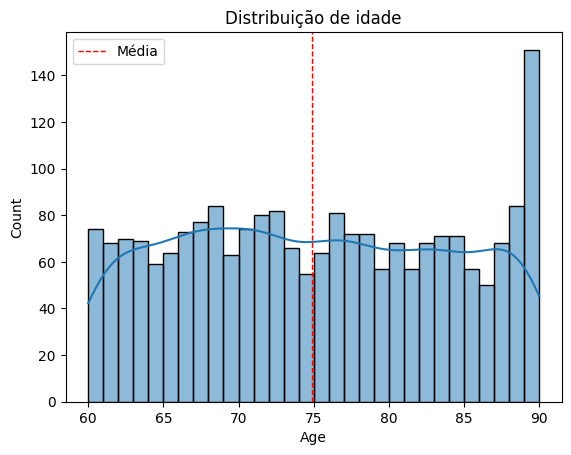

Média: 74.91
Mediana: 75.0
Desvio Padrão: 8.99


In [ ]:
#Distribuição da idade dos pacientes.
sns.histplot(x=df['Age'], bins=30, kde=True)

mean_age = df['Age'].mean().round(2)
median_age = round(df['Age'].median(), 2)
std_age = round(df['Age'].std(), 2)

plt.axvline(mean_age, color='red', linestyle='--', linewidth=1, label='Média')
plt.legend()

plt.title('Distribuição de idade')

plt.show()

print(f'Média: {mean_age}')
print(f'Mediana: {median_age}')
print(f'Desvio Padrão: {std_age}')

**Age**

O que a variável representa no contexto do dataset: A variável Age representa a idade do paciente no momento da coleta dos dados. Este dado é importante para entender a relação entre a idade e a progressão da doença de Alzheimer existe dentro de uma população ja idosa.

Tipo de distribuição: Uniforme, com uma leve tendência para a direita.

Assimetria: 0.05 (Próximo de 0, indicando simetria).

Curtose: -1.19 (Platicúrtica, distribuição mais achatada do que uma distribuição normal).

**Média: 74,91 | Mediana: 75,0 | Desvio Padrão: 8,99**

A média e a mediana são praticamente iguais, sugerindo uma distribuição simétrica centrada em torno dos 75 anos. O desvio moderado mostra que a maioria dos pacientes está dentro da faixa de 66 a 84 anos. Isto demonstra na base que a idade dos pacientes idosos é bem distribuida dentro da faixa.



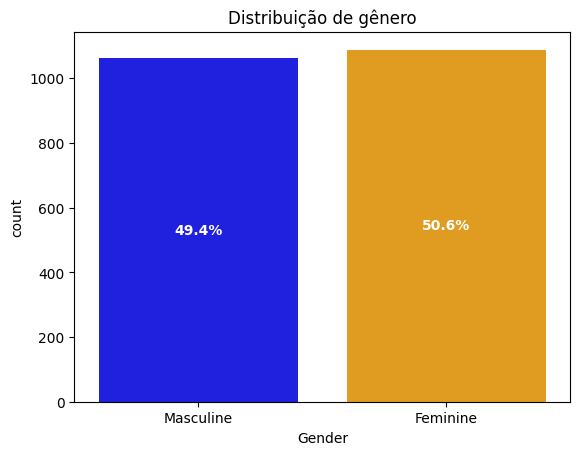

In [ ]:
#Distribuição do genero dos pacientes.
ax = sns.countplot(x='Gender', data=df, hue='Gender', palette=paleta_gender)

total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.text(
        p.get_x() + p.get_width() / 2,
        count / 2,
        f'{percentage:.1f}%',
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Distribuição de gênero')

plt.show()

**Gender**

O que a variável representa no contexto do dataset: Gênero do paciente (masculino ou feminino). O gênero pode ter impacto no risco de Alzheimer, podendo indicar diferentes padrões de prevalência entre homens e mulheres como existem em outras doenças.

Tipo de distribuição: Variavel categórica distribuida unifromemente com uma pequena quantidade a mais de pacientes femininas do que masculinos.



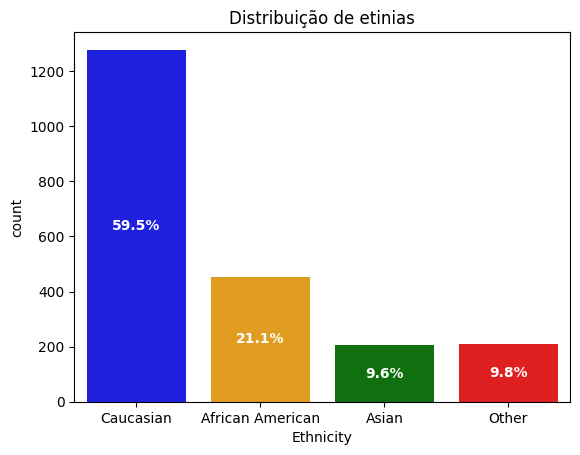

In [ ]:
#Distribuição da etinia dos pacientes.
ax = sns.countplot(x=df['Ethnicity'], hue=df['Ethnicity'], order = order_Ethnicity, palette = paleta_Ethnicity)

total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.text(
        p.get_x() + p.get_width() / 2,
        count / 2,
        f'{percentage:.1f}%',
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Distribuição de etinias')
plt.show()

**Ethnicity**

O que a variável representa no contexto do dataset: Etnia do paciente. A etnia pode ser relevante para estudos sobre como fatores genéticos de certos grupos podem influenciar o risco de Alzheimer.

Tipo de distribuição: Variavél categórica distribuida de maneira assimétrica com grande parte da população pertencente a etinia caucasiana.



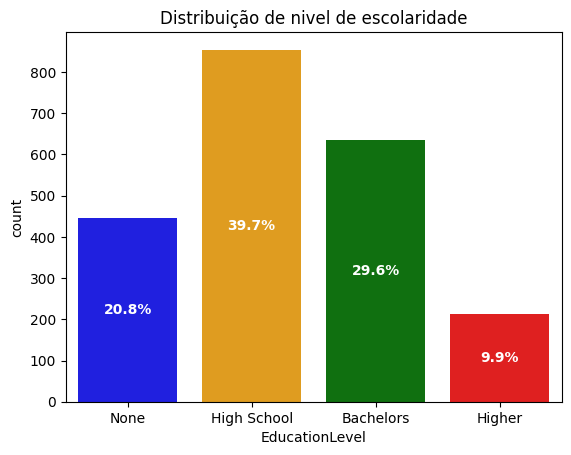

In [ ]:
#Distribuição do nivel de escolaridade dos pacientes.
ax = sns.countplot(x=df['EducationLevel'], hue=df['EducationLevel'], order = order_EducationLevel, palette = paleta_EducationLevel)

total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.text(
        p.get_x() + p.get_width() / 2,
        count / 2,
        f'{percentage:.1f}%',
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Distribuição de nivel de escolaridade')
plt.show()

**EducationLevel**

O que a variável representa no contexto do dataset: O nível de educação do paciente, que pode estar associado à capacidade cognitiva e ao risco de desenvolver Alzheimer. A educação pode atuar como um fator 'protetor' para as funções cognitivas.

Tipo de distribuição: Variavél categórca com uma distribuição que se assemelha a normal tendo uma distribuição maior ao centro e formando caudas nas pontas.



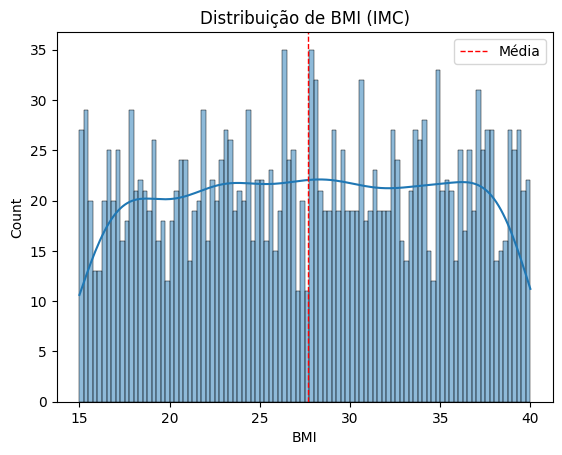

Média: 27.66
Mediana: 27.82
Desvio Padrão: 7.22


In [ ]:
#Distribuição do IMC dos pacientes.
sns.histplot(x=df['BMI'],
             bins=100,
             kde=True)

mean_bmi = df['BMI'].mean().round(2)
median_bmi = round(df['BMI'].median(), 2)
std_bmi = round(df['BMI'].std(), 2)

plt.axvline(mean_bmi, color='red', linestyle='--', linewidth=1, label='Média')
plt.legend()

plt.title('Distribuição de BMI (IMC)')
plt.show()

print(f'Média: {mean_bmi}')
print(f'Mediana: {median_bmi}')
print(f'Desvio Padrão: {std_bmi}')

**BMI**

O que a variável representa no contexto do dataset: O BMI (Índice de Massa Corporal) do paciente, que é uma medida do peso em relação à altura. O BMI é importante para avaliar o risco de doenças associadas ao excesso de peso ou obesidade e se elas podem interferir no diagnostico de alzheimer.

Tipo de distribuição: Uniforme

Assimetria: -0.03 (Próximo de 0, indicando simetria).

Curtose: -1.18 (Platicúrtica, distribuição mais achatada).

**Média: 27,66 | Mediana: 27,82 | Desvio Padrão: 7,22**

Valores centrais próximos indicam simetria na distribuição, e o desvio padrão aponta variações de estado nutricional entre pacientes, com muitos distribuidos longe da média de peso, indicando grande presença de pacientes abaixo e acima do peso ideal.

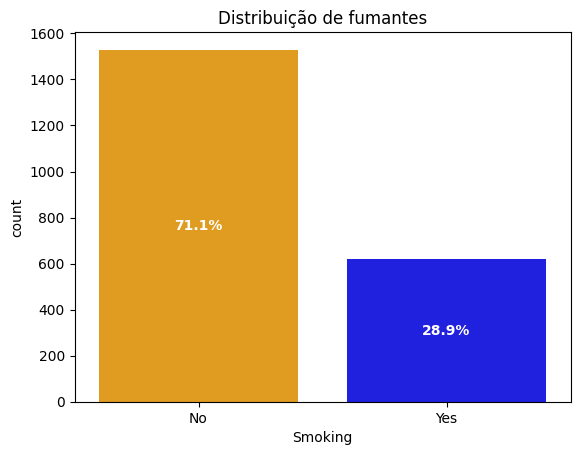

In [ ]:
#Distribuição da quantidade de fumantes dos pacientes.
ax = sns.countplot(x=df['Smoking'], hue=df['Smoking'], order = order_YesOrNo, palette = paleta_sn)

total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.text(
        p.get_x() + p.get_width() / 2,
        count / 2,
        f'{percentage:.1f}%',
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Distribuição de fumantes')
plt.show()

**Smoking**

O que a variável representa no contexto do dataset: Tabagismo do paciente, que é um fator de risco conhecido para várias doenças, incluindo doenças cardiovasculares e neurodegenerativas.

Tipo de distribuição: Variavél categórica que apresenta uma distribuição assimétrica com grande parte da população na categoria dos não fumantes.



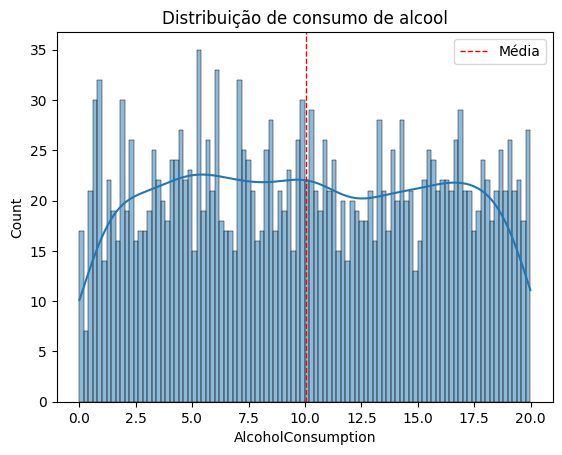

Média: 10.04
Mediana: 9.93
Desvio Padrão: 5.76


In [ ]:
#Distribuição do consumo de alcol dos pacientes.
sns.histplot(x=df['AlcoholConsumption'],
             bins=100,
             kde=True)

mean_ac = df['AlcoholConsumption'].mean().round(2)
median_ac = round(df['AlcoholConsumption'].median(), 2)
std_ac = round(df['AlcoholConsumption'].std(), 2)

plt.axvline(mean_ac, color='red', linestyle='--', linewidth=1, label='Média')
plt.legend()

plt.title('Distribuição de consumo de alcool')
plt.show()

print(f'Média: {mean_ac}')
print(f'Mediana: {median_ac}')
print(f'Desvio Padrão: {std_ac}')

**AlcoholConsumption**

O que a variável representa no contexto do dataset: A quantidade de álcool consumido pelo paciente, que pode ter implicações na saúde cerebral e no risco de desenvolver Alzheimer.

Tipo de distribuição: Uniforme.

Assimetria: 0.02 (Próximo de 0, indicando simetria).

Curtose: -1.20 (Platicúrtica, distribuição mais achatada).

**Média: 10,04 | Mediana: 9,93 | Desvio Padrão: 5,76**

Distribuição equilibrada com variação moderada. Os valores mostram que há pacientes com baixos e outros com consumos mais elevados mas a maioria tendo histórico de consumo de alcool.

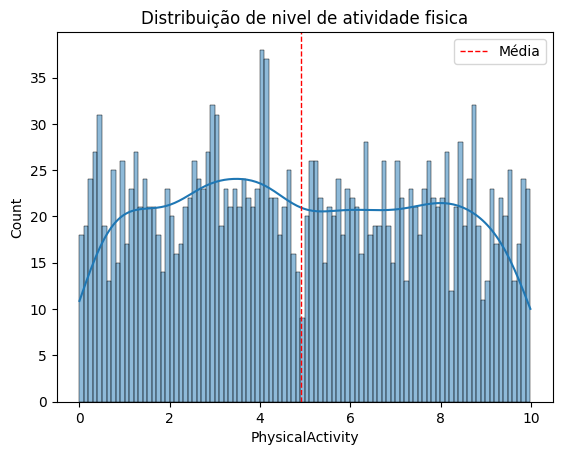

Média: 4.92
Mediana: 4.77
Desvio Padrão: 2.86


In [ ]:
#Distribuição das atividades fisicas dos pacientes.
sns.histplot(x=df['PhysicalActivity'],
             bins=100,
             kde=True)

mean_pa = df['PhysicalActivity'].mean().round(2)
median_pa = round(df['PhysicalActivity'].median(), 2)
std_pa = round(df['PhysicalActivity'].std(), 2)

plt.axvline(mean_pa, color='red', linestyle='--', linewidth=1, label='Média')
plt.legend()

plt.title('Distribuição de nivel de atividade fisica')
plt.show()

print(f'Média: {mean_pa}')
print(f'Mediana: {median_pa}')
print(f'Desvio Padrão: {std_pa}')

**PhysicalActivity**

O que a variável representa no contexto do dataset: O nível de atividade física do paciente. A atividade física é associada à saúde cognitiva e a prevenção de uma série de doenças, podemos identificar relações entre a quantidade de exercicio feito durante a vida do paciente e o desenvolvimento da doença.

Tipo de distribuição: Uniforme.

Assimetria: 0.04 (Próximo de 0, indicando simetria).

Curtose: -1.18 (Platicúrtica, distribuição mais achatada).

**4,92 | Mediana: 4,77 | Desvio Padrão: 2,86**

Média e mediana próximas indicam simetria, enquanto o desvio sugere que há tanto pacientes ativos (dentro do que as condições fisicas de cada paciente permite) quanto sedentários.

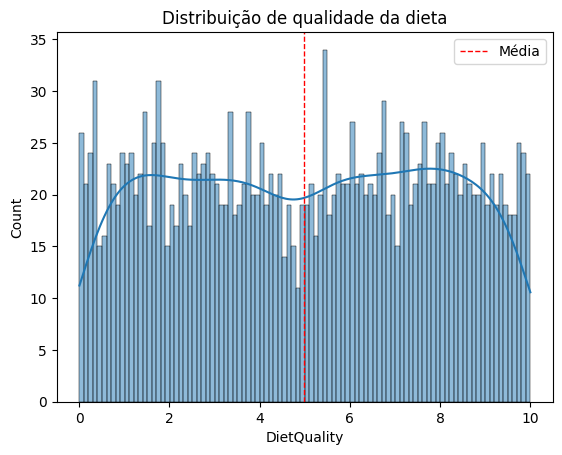

Média: 4.99
Mediana: 5.08
Desvio Padrão: 2.91


In [ ]:
#Distribuição da qualidade da dieta dos pacientes.
sns.histplot(x=df['DietQuality'],
             bins=100,
             kde=True)

mean_dq = df['DietQuality'].mean().round(2)
median_dq = round(df['DietQuality'].median(), 2)
std_dq = round(df['DietQuality'].std(), 2)

plt.axvline(mean_dq, color='red', linestyle='--', linewidth=1, label='Média')
plt.legend()

plt.title('Distribuição de qualidade da dieta')
plt.show()

print(f'Média: {mean_dq}')
print(f'Mediana: {median_dq}')
print(f'Desvio Padrão: {std_dq}')

**DietQuality**

O que a variável representa no contexto do dataset: A qualidade da dieta do paciente, medida em uma escala que avalia o impacto da alimentação na saúde geral.

Tipo de distribuição: Uniforme.

Assimetria: -0.01 (próximo de 0, indicando simetria).

Curtose: -1.23 (Platicúrtica, distribuição mais achatada).

**Média: 4,99 | Mediana: 5,08 | Desvio Padrão: 2,91**

Valores centrais semelhantes mostram que os pacientes têm, em geral, uma dieta moderadamente equilibrada, com variação perceptível que mostra que existe uma parte dos pacientes não possuem uma dieta de qualidade.

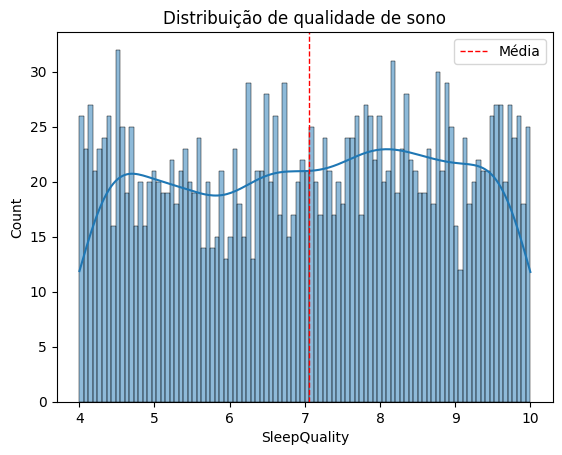

Média: 7.05
Mediana: 7.12
Desvio Padrão: 1.76


In [ ]:
#Distribuição da qualidade do sono dos pacientes.
sns.histplot(x=df['SleepQuality'],
             bins=100,
             kde=True)

mean_sq = df['SleepQuality'].mean().round(2)
median_sq = round(df['SleepQuality'].median(), 2)
std_sq = round(df['SleepQuality'].std(), 2)

plt.axvline(mean_sq, color='red', linestyle='--', linewidth=1, label='Média')
plt.legend()

plt.title('Distribuição de qualidade de sono')
plt.show()

print(f'Média: {mean_sq}')
print(f'Mediana: {median_sq}')
print(f'Desvio Padrão: {std_sq}')

**SleepQuality**

O que a variável representa no contexto do dataset: A qualidade do sono do paciente, que pode afetar a saúde mental e o risco de doenças neurodegenerativas.

Tipo de distribuição: Uniforme.

Assimetria: -0.07 (Próximo de 0, indicando simetria).

Curtose: -1.21 (Platicúrtica, distribuição mais achatada).

**Média: 7,05 | Mediana: 7,12 | Desvio Padrão: 1,76**

A baixa diferença entre média e mediana indica que na média os pacientes tem uma boa qualidade de sono, alguns fogem desta média, mas baseado no desvio pequeno a qualidade do sono geral é bem concentrada próximo aos centros.

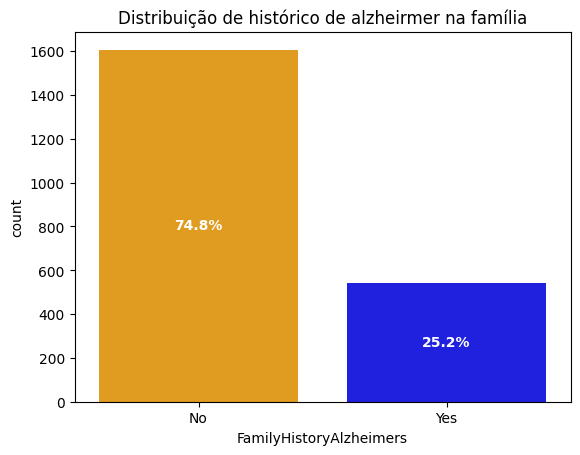

In [ ]:
#Distribuição do historico de alzheimer na familia dos pacientes.
ax = sns.countplot(x=df['FamilyHistoryAlzheimers'], hue=df['FamilyHistoryAlzheimers'], order = order_YesOrNo, palette = paleta_sn)

total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.text(
        p.get_x() + p.get_width() / 2,
        count / 2,
        f'{percentage:.1f}%',
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Distribuição de histórico de alzheirmer na família')
plt.show()

**FamilyHistoryAlzheimers**

O que a variável representa no contexto do dataset: Histórico familiar de Alzheimer, que é um fator a ser analisado para o desenvolvimento da doença.

Tipo de distribuição: Variavél categórica que apresenta uma distribuição assimétrica com grande parte da população não tendo histórico da doença na familia.



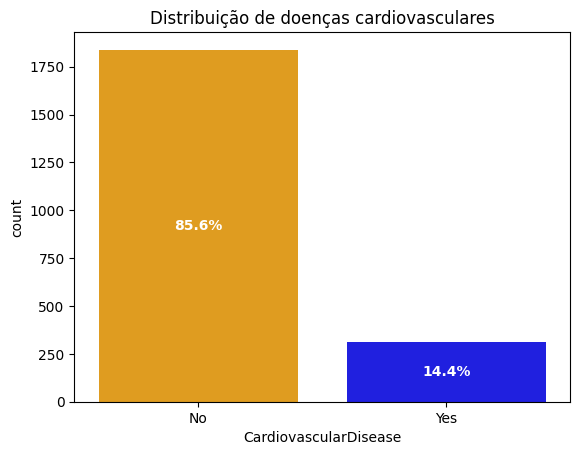

In [ ]:
#Distribuição de doenças cardiovasculares dos pacientes.
ax = sns.countplot(x=df['CardiovascularDisease'], hue=df['CardiovascularDisease'], order = order_YesOrNo, palette = paleta_sn)

total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.text(
        p.get_x() + p.get_width() / 2,
        count / 2,
        f'{percentage:.1f}%',
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Distribuição de doenças cardiovasculares')
plt.show()

**CardiovascularDisease**

O que a variável representa no contexto do dataset: Doença cardiovascular dos pacientes, que é um fator de risco que pode estar relacionado com o desenolvimento de doenças neurodegenerativas.

Tipo de distribuição: variavél categórica que apresenta uma distribuição assimétrica com grande parte da população não apresentando doenças cardiovasculares.



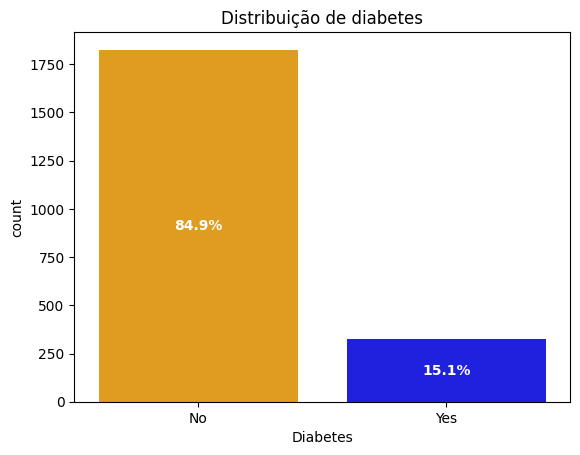

In [ ]:
#Distribuição de diabetes dos pacientes.
ax = sns.countplot(x=df['Diabetes'], hue=df['Diabetes'], order = order_YesOrNo, palette = paleta_sn)

total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.text(
        p.get_x() + p.get_width() / 2,
        count / 2,
        f'{percentage:.1f}%',
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Distribuição de diabetes')
plt.show()

**Diabetes**

O que a variável representa no contexto do dataset: A presença de diabetes nos pacientes, uma condição que pode ter relação com o aumento do risco de doenças neurodegenerativas, incluindo Alzheimer.

Tipo de distribuição: variavél categórica que apresenta uma distribuição assimétrica com grande parte da população não apresentando diabetes.



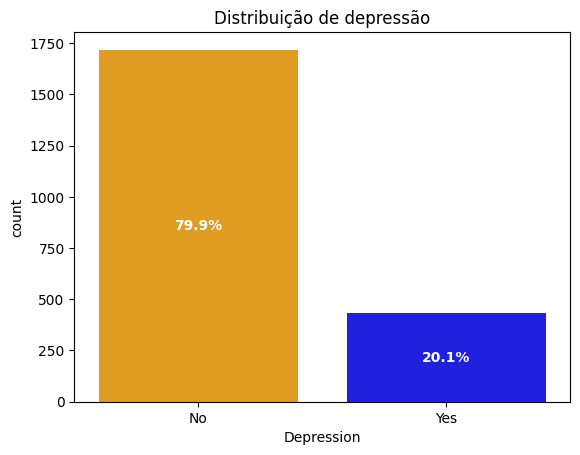

In [ ]:
#Distribuição de deprressao dos pacientes.
ax = sns.countplot(x=df['Depression'], hue=df['Depression'], order = order_YesOrNo, palette = paleta_sn)

total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.text(
        p.get_x() + p.get_width() / 2,
        count / 2,
        f'{percentage:.1f}%',
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Distribuição de depressão')
plt.show()

**Depression**

O que a variável representa no contexto do dataset: Casos de depressão dos pacientes, que em pessoas idosas, é uma condição frequentemente associada ao aumento do risco doenças cognitivas.

Tipo de distribuição: Variavél categórica que apresenta uma distribuição assimétrica com grande parte da população não apresentando depressão.



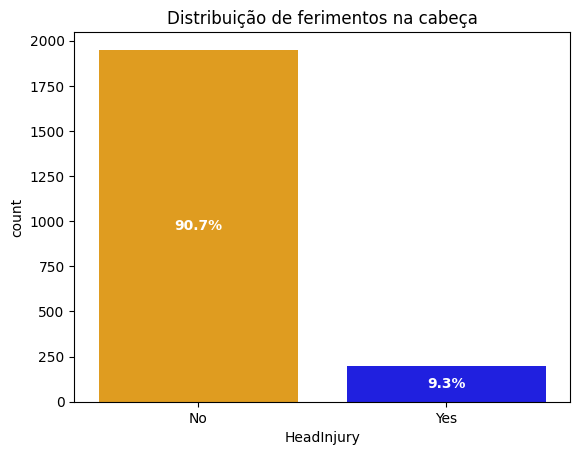

In [ ]:
#Distribuição de ferimentos na cabeça dos pacientes.
ax = sns.countplot(x=df['HeadInjury'], hue=df['HeadInjury'], order = order_YesOrNo, palette = paleta_sn)

total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.text(
        p.get_x() + p.get_width() / 2,
        count / 2,
        f'{percentage:.1f}%',
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Distribuição de ferimentos na cabeça')
plt.show()

**HeadInjury**

O que a variável representa no contexto do dataset: Histórico de lesões na cabeça do paciente, um fator a ser analisado para o desenvolvimento de demência e Alzheimer, especialmente quando as lesões são graves.

Tipo de distribuição: Variavél categórica que apresenta uma distribuição assimétrica com grande parte da população não apresentando histórico de ferimentos na cabeça.



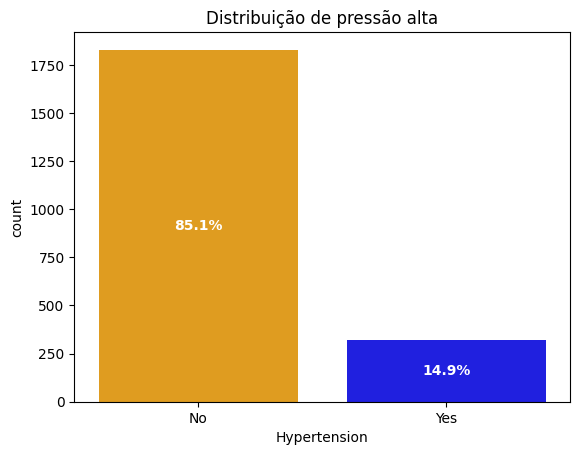

In [ ]:
#Distribuição de pressao alta dos pacientes.
ax = sns.countplot(x=df['Hypertension'], hue=df['Hypertension'], order = order_YesOrNo, palette = paleta_sn)

total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.text(
        p.get_x() + p.get_width() / 2,
        count / 2,
        f'{percentage:.1f}%',
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Distribuição de pressão alta')
plt.show()

**Hypertension**

O que a variável representa no contexto do dataset: Hipertensão nos pacientes, uma condição que está frequentemente associada ao risco de doenças em pacientes nesta faixa de idade.

Tipo de distribuição: Variavél categórica que apresenta uma distribuição assimétrica com grande parte da população não apresentando hipertensão.



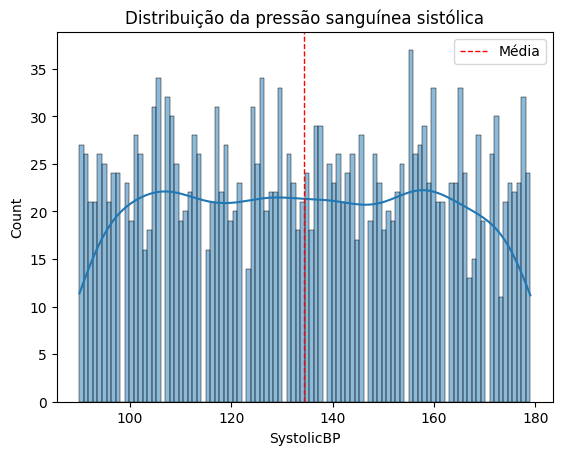

Média: 134.26
Mediana: 134.0
Desvio Padrão: 25.95


In [ ]:
#Distribuição da pressao sanguinea sistolica dos pacientes.
sns.histplot(x=df['SystolicBP'],
             bins=100,
             kde=True)

mean_sbp = df['SystolicBP'].mean().round(2)
median_sbp = round(df['SystolicBP'].median(), 2)
std_sbp = round(df['SystolicBP'].std(), 2)

plt.axvline(mean_sbp, color='red', linestyle='--', linewidth=1, label='Média')
plt.legend()

plt.title('Distribuição da pressão sanguínea sistólica')
plt.show()

print(f'Média: {mean_sbp}')
print(f'Mediana: {median_sbp}')
print(f'Desvio Padrão: {std_sbp}')

**SystolicBP**

O que a variável representa no contexto do dataset: A pressão arterial sistólica dos pacientes, um importante indicador da saúde cardiovascular e um fator de risco significativo outras doenças em pacientes nesta faixa de idade.

Tipo de distribuição: Uniforme.

Assimetria: 0.01 (próximo de 0, indicando simetria).

Curtose: -1.20 (Platicúrtica, distribuição mais achatada).

**Média: 134,26 | Mediana: 134,0 | Desvio Padrão: 25,95**

Valores centrais similares e uma variação moderada indicam que existem pacientes com diferentes níveis de pressão sistólica distribuidos na base.

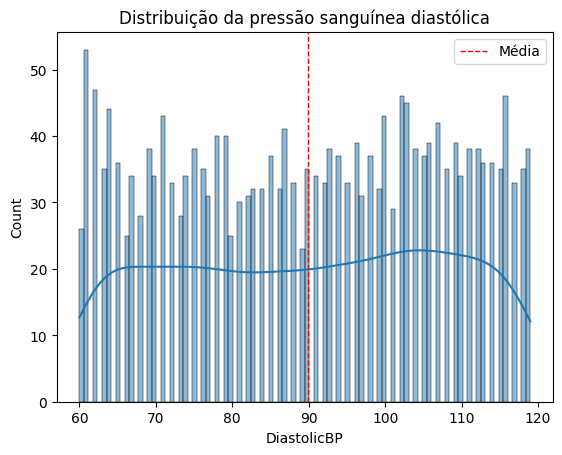

Média: 89.85
Mediana: 91.0
Desvio Padrão: 17.59


In [ ]:
#Distribuição da pressao sanguinea diastolica dos pacientes.
sns.histplot(x=df['DiastolicBP'],
             bins=100,
             kde=True)

mean_dbp = df['DiastolicBP'].mean().round(2)
median_dbp = round(df['DiastolicBP'].median(), 2)
std_dbp = round(df['DiastolicBP'].std(), 2)

plt.axvline(mean_dbp, color='red', linestyle='--', linewidth=1, label='Média')
plt.legend()

plt.title('Distribuição da pressão sanguínea diastólica')
plt.show()

print(f'Média: {mean_dbp}')
print(f'Mediana: {median_dbp}')
print(f'Desvio Padrão: {std_dbp}')

**DiastolicBP**

O que a variável representa no contexto do dataset: A pressão arterial diastólica dos pacientes, outro indicador importante da saúde cardiovascular, relacionada ao risco de doenças em pacientes nesta faixa de idade.

Tipo de distribuição: Uniforme.

Assimetria: -0.05 (Próximo de 0, indicando simetria).

Curtose: -1.23 (Platicúrtica, distribuição mais achatada).

**Média: 89,85 | Mediana: 91,0 | Desvio Padrão: 17,59**

Valores centrais similares e uma variação moderada indicam que existem pacientes com diferentes níveis de pressão disatólica distribuidos na base.

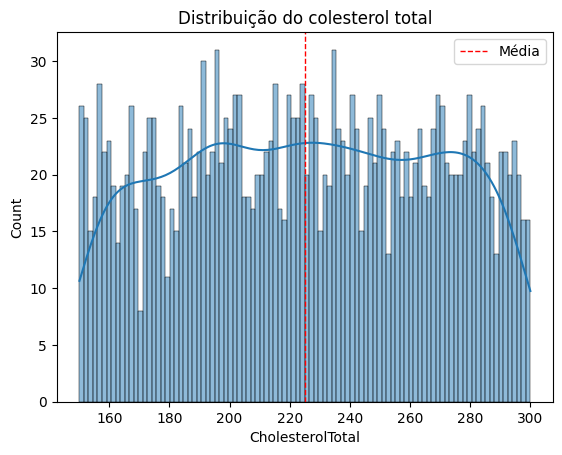

Média: 225.2
Mediana: 225.09
Desvio Padrão: 42.54


In [ ]:
#Distribuição do colesterol total dos pacientes.
sns.histplot(x=df['CholesterolTotal'],
             bins=100,
             kde=True)

mean_ct = df['CholesterolTotal'].mean().round(2)
median_ct = round(df['CholesterolTotal'].median(), 2)
std_ct = round(df['CholesterolTotal'].std(), 2)

plt.axvline(mean_ct, color='red', linestyle='--', linewidth=1, label='Média')
plt.legend()

plt.title('Distribuição do colesterol total')
plt.show()

print(f'Média: {mean_ct}')
print(f'Mediana: {median_ct}')
print(f'Desvio Padrão: {std_ct}')

**CholesterolTotal**

O que a variável representa no contexto do dataset: O colesterol total no sangue dos pacientes, que pode ser um fator de risco para doenças no geral em pacientes nesta faixa de idade.

Tipo de distribuição: Uniforme.

Assimetria: -0.02 (Próximo de 0, indicando simetria).

Curtose: -1.16 (Platicúrtica, distribuição mais achatada).

**Média: 225,2 | Mediana: 225,09 | Desvio Padrão: 42,54**

Distribuição bem centrada com uma alta dispersão, revelando pacientes com colesterol dentro e fora dos níveis ideais distribuidos pela base.

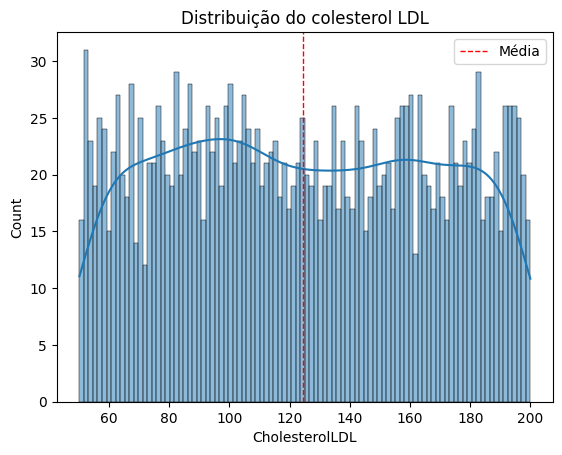

Média: 124.34
Mediana: 123.34
Desvio Padrão: 43.37


In [ ]:
#Distribuição do colesterol LDL dos pacientes.
sns.histplot(x=df['CholesterolLDL'],
             bins=100,
             kde=True)

mean_ldl = df['CholesterolLDL'].mean().round(2)
median_ldl = round(df['CholesterolLDL'].median(), 2)
std_ldl = round(df['CholesterolLDL'].std(), 2)

plt.axvline(mean_ldl, color='red', linestyle='--', linewidth=1, label='Média')
plt.legend()

plt.title('Distribuição do colesterol LDL')
plt.show()

print(f'Média: {mean_ldl}')
print(f'Mediana: {median_ldl}')
print(f'Desvio Padrão: {std_ldl}')

**CholesterolLDL**

O que a variável representa no contexto do dataset: O colesterol LDL (lipoproteína de baixa densidade), conhecido como "colesterol ruim", que pode contribuir para o risco de varias complicações em pacientes nesta faixa de idade.

Tipo de distribuição: Uniforme.

Assimetria: 0.04 (Próximo de 0, indicando simetria).

Curtose: -1.21 (Platicúrtica, distribuição mais achatada).

**Média: 124,34 | Mediana: 123,34 | Desvio Padrão: 43,37**

Valores centrais similares, com grande variação nos níveis do colesterol “ruim” entre os pacientes, indicando que existe pacientens com varios niveis de LDL distribuidos.

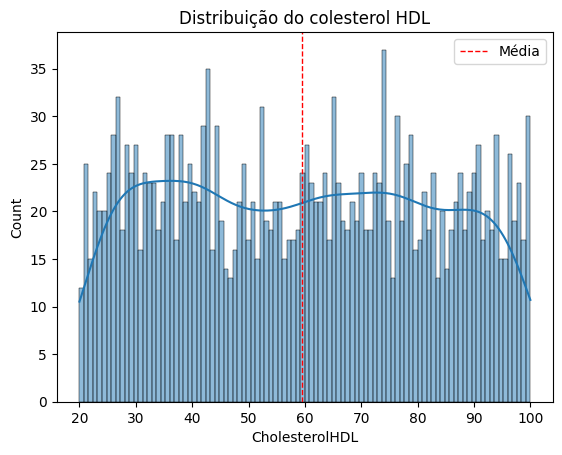

Média: 59.46
Mediana: 59.77
Desvio Padrão: 23.14


In [ ]:
#Distribuição do colesterol HDL dos pacientes.
sns.histplot(x=df['CholesterolHDL'],
             bins=100,
             kde=True)

mean_hdl = df['CholesterolHDL'].mean().round(2)
median_hdl = round(df['CholesterolHDL'].median(), 2)
std_hdl = round(df['CholesterolHDL'].std(), 2)

plt.axvline(mean_hdl, color='red', linestyle='--', linewidth=1, label='Média')
plt.legend()

plt.title('Distribuição do colesterol HDL')
plt.show()

print(f'Média: {mean_hdl}')
print(f'Mediana: {median_hdl}')
print(f'Desvio Padrão: {std_hdl}')

**CholesterolHDL**

O que a variável representa no contexto do dataset: O colesterol HDL (lipoproteína de alta densidade), o "colesterol bom", que ajuda a remover o colesterol LDL do sangue, sendo importante para a saúde no geral.

Tipo de distribuição: Uniforme.

Assimetria: 0.04 (Próximo de 0, indicando simetria).

Curtose: -1.22 (platicúrtica, distribuição mais achatada).

**Média: 59,46 | Mediana: 59,77 | Desvio Padrão: 23,14**

Média e mediana equilibradas indicam uma distribuição uniforme, com variações moderadas entre pacientes, indicando que a base tem uma distribuição bem uniforme de niveis de HDL entre os pacientes.

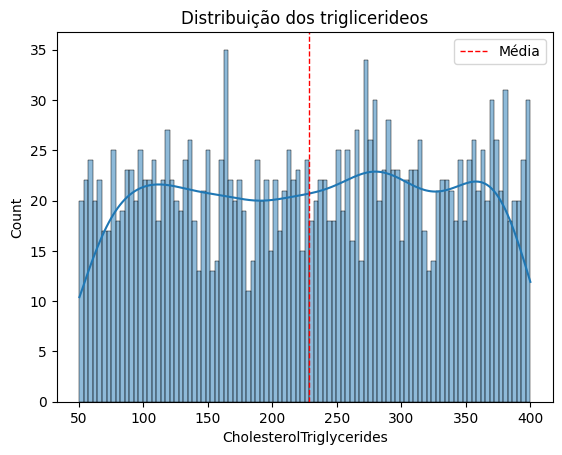

Média: 228.28
Mediana: 230.3
Desvio Padrão: 101.99


In [ ]:
#Distribuição dos triglicerideos dos pacientes.
sns.histplot(x=df['CholesterolTriglycerides'],
             bins=100,
             kde=True)

mean_cty = df['CholesterolTriglycerides'].mean().round(2)
median_cty = round(df['CholesterolTriglycerides'].median(), 2)
std_cty = round(df['CholesterolTriglycerides'].std(), 2)

plt.axvline(mean_cty, color='red', linestyle='--', linewidth=1, label='Média')
plt.legend()

plt.title('Distribuição dos triglicerideos')
plt.show()

print(f'Média: {mean_cty}')
print(f'Mediana: {median_cty}')
print(f'Desvio Padrão: {std_cty}')

**CholesterolTriglycerides**

O que a variável representa no contexto do dataset: Os triglicerídeos no sangue, que são um tipo de gordura. Níveis elevados de triglicerídeos geralmente estão associados ao aumento de riscos para doenças neurodegenerativas.

Tipo de distribuição: Uniforme.

Assimetria: -0.03 (Próximo de 0, indicando simetria).

Curtose: -1.22 (Platicúrtica, distribuição mais achatada).

**Média: 228,28 | Mediana: 230,3 | Desvio Padrão: 101,99**

Apesar da média e mediana próximas mostrando uma distribuição uniforme os valores da média ja estão acima do aceitavél que é 200, o alto desvio mostra ampla variação, com muitos pacientes apresentando níveis muito elevados.

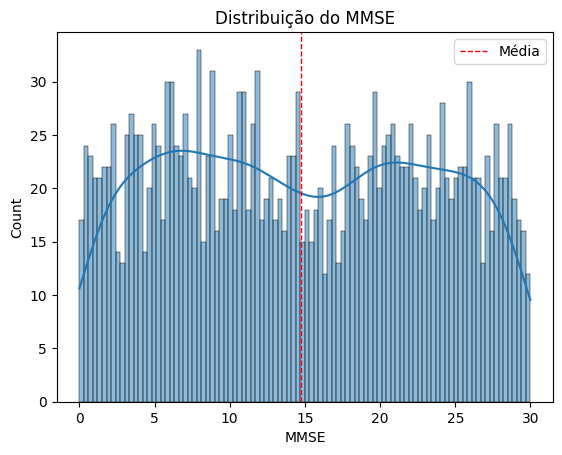

Média: 14.76
Mediana: 14.44
Desvio Padrão: 8.61


In [ ]:
#Distribuição do Mini-Mental State Examination score dos pacientes.
sns.histplot(x=df['MMSE'],
             bins=100,
             kde=True)

mean_mmse = df['MMSE'].mean().round(2)
median_mmse = round(df['MMSE'].median(), 2)
std_mmse = round(df['MMSE'].std(), 2)

plt.axvline(mean_mmse, color='red', linestyle='--', linewidth=1, label='Média')
plt.legend()

plt.title('Distribuição do MMSE')
plt.show()

print(f'Média: {mean_mmse}')
print(f'Mediana: {median_mmse}')
print(f'Desvio Padrão: {std_mmse}')

**MMSE**

O que a variável representa no contexto do dataset: O MMSE (Mini-Mental State Examination) é um exame utilizado para medir o desempenho cognitivo dos pacientes, frequentemente usado para detectar sinais de demência e alzheimer.

Tipo de distribuição: Bimodal (Por mais que seja bem uniforme é possivel notar uma leve separação entre dois grupos próximo a média).

Assimetria: 0.03 (próximo de 0, indicando simetria).

Curtose: -1.23 (Platicúrtica, distribuição mais achatada).

**Média: 14,76 | Mediana: 14,44 | Desvio Padrão: 8,61**

A distribuição é centrada, mas o desvio indica grande diferença no nível cognitivo dos pacientes apresentando uma concentração entre 7 e 23 pontos.
Tambem apresenta uma leva separação entre 2 grupos (acima e abaixo de 15 pontos).

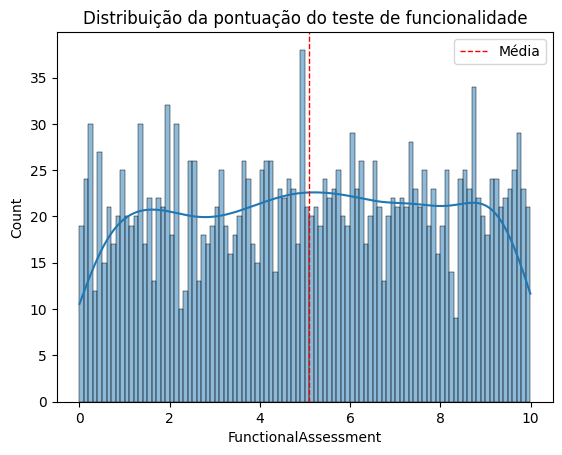

Média: 5.08
Mediana: 5.09
Desvio Padrão: 2.89


In [ ]:
#Distribuição do teste de funcionalidade dos pacientes.
sns.histplot(x=df['FunctionalAssessment'],
             bins=100,
             kde=True)

mean_fa = df['FunctionalAssessment'].mean().round(2)
median_fa = round(df['FunctionalAssessment'].median(), 2)
std_fa = round(df['FunctionalAssessment'].std(), 2)

plt.axvline(mean_fa, color='red', linestyle='--', linewidth=1, label='Média')
plt.legend()

plt.title('Distribuição da pontuação do teste de funcionalidade')
plt.show()

print(f'Média: {mean_fa}')
print(f'Mediana: {median_fa}')
print(f'Desvio Padrão: {std_fa}')

**FunctionalAssessment**

O que a variável representa no contexto do dataset: A avaliação funcional dos pacientes, que mede sua capacidade de realizar atividades do dia a dia, um fator crítico na avaliação da progressão da de doenças mentais.

Tipo de distribuição: Uniforme.

Assimetria: -0.03 (Próximo de 0, indicando simetria).

Curtose: -1.18 (Platicúrtica, distribuição mais achatada).

**Média: 5,08 | Mediana: 5,09 | Desvio Padrão: 2,89**

Distribuição simétrica com uma dispersão moderada, indicando diferentes níveis de independência funcional dentro os pacientes, apresentando uma concentração entre 2 e 8 pontos.

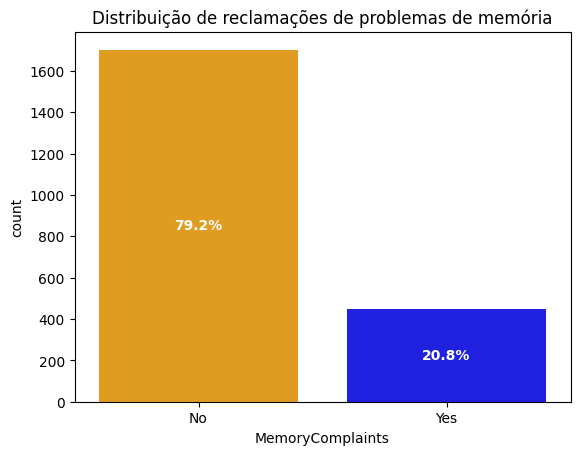

In [ ]:
#Distribuição das reclamações de problemas de memoria dos pacientes.
ax = sns.countplot(x=df['MemoryComplaints'], hue=df['MemoryComplaints'], order = order_YesOrNo, palette = paleta_sn)

total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.text(
        p.get_x() + p.get_width() / 2,
        count / 2,
        f'{percentage:.1f}%',
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Distribuição de reclamações de problemas de memória')
plt.show()

**MemoryComplaints**

O que a variável representa no contexto do dataset: Queixas de memória dos pacientes, uma variável importante para avaliar a presença de dificuldades cognitivas que podem estar associadas ao Alzheimer.

Tipo de distribuição: Variavél categórica que apresenta uma distribuição assimétrica com grande parte da população não apresentando queixas de problemas de memória.



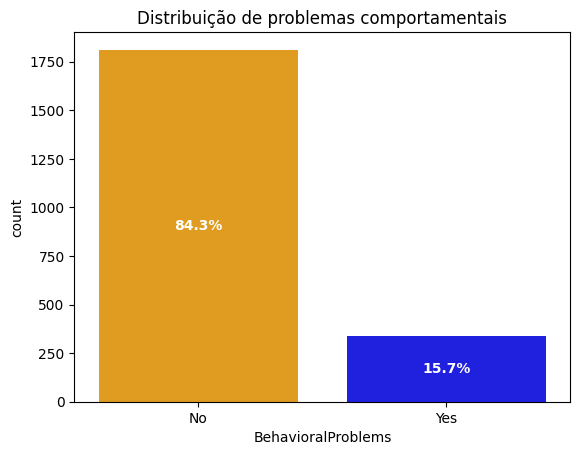

In [ ]:
#Distribuição de problemas comportamentais dos pacientes.
ax = sns.countplot(x=df['BehavioralProblems'], hue=df['BehavioralProblems'], order = order_YesOrNo, palette = paleta_sn)

total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.text(
        p.get_x() + p.get_width() / 2,
        count / 2,
        f'{percentage:.1f}%',
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Distribuição de problemas comportamentais')
plt.show()

**BehavioralProblems**

O que a variável representa no contexto do dataset: Problemas comportamentais dos pacientes, como agressividade, irritabilidade e outros comportamentos observados em pacientes que podem estar desenvolvendo Alzheimer.

Tipo de distribuição: Variavél categórica que apresenta uma distribuição assimétrica com grande parte da população não apresentando problemas de comportamento.



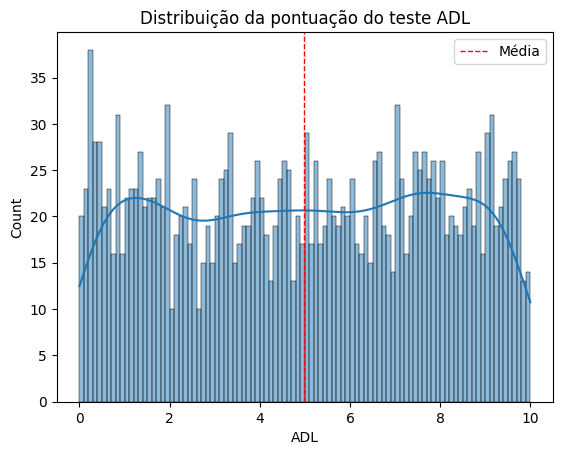

Média: 4.98
Mediana: 5.04
Desvio Padrão: 2.95


In [ ]:
#Distribuição da Activities of Daily Living score dos pacientes.
sns.histplot(x=df['ADL'],
             bins=100,
             kde=True)

mean_adl = df['ADL'].mean().round(2)
median_adl = round(df['ADL'].median(), 2)
std_adl = round(df['ADL'].std(), 2)

plt.axvline(mean_adl, color='red', linestyle='--', linewidth=1, label='Média')
plt.legend()

plt.title('Distribuição da pontuação do teste ADL')
plt.show()

print(f'Média: {mean_adl}')
print(f'Mediana: {median_adl}')
print(f'Desvio Padrão: {std_adl}')

**ADL**

O que a variável representa no contexto do dataset: Atividades da vida diária (ADL) são atividades fundamentais que uma pessoa realiza diariamente, como alimentação, vestuário e higiene. Essa variável avalia a independência do paciente em relação a essas atividades.

Tipo de distribuição: Uniforme.

Assimetria: -0.03 (Próximo de 0, indicando simetria).

Curtose: -1.25 (Platicúrtico, distribuição mais achatada).

**Média: 4,98 | Mediana: 5,04 | Desvio Padrão: 2,95**

Média e mediana quase iguais com variação razoável, refletindo graus distintos de autonomia entre os pacientes apresentando uma maior concentração entre 2 e 8 pontos.

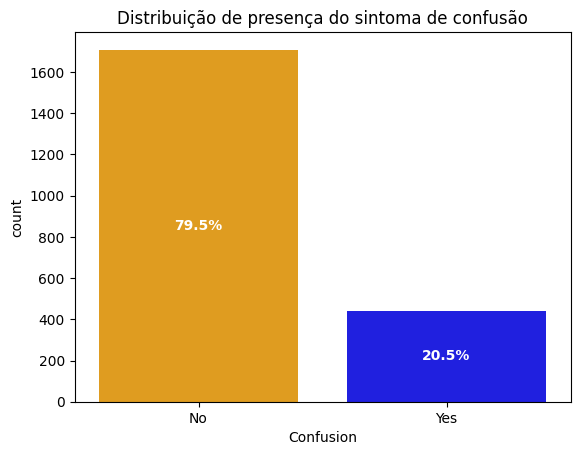

In [ ]:
#Distribuição dos pacientes que apresentaram confusão.
ax = sns.countplot(x=df['Confusion'], hue=df['Confusion'], order = order_YesOrNo, palette = paleta_sn)

total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.text(
        p.get_x() + p.get_width() / 2,
        count / 2,
        f'{percentage:.1f}%',
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Distribuição de presença do sintoma de confusão')
plt.show()

**Confusion**

O que a variável representa no contexto do dataset: Presença de confusão nos pacientes, um sintoma comum em estágios mais avançados de demência, onde o paciente pode ter dificuldade em reconhecer pessoas ou lugares podendo ser um indicativo para alzheimer.

Tipo de distribuição: Variavél categórica que apresenta uma distribuição assimétrica com grande parte da população não apresentando confusão.



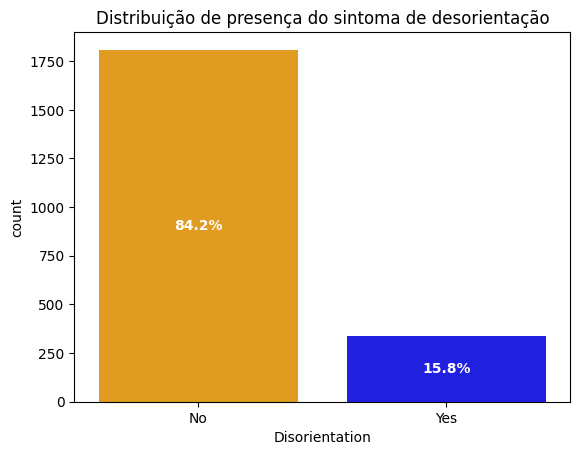

In [ ]:
#Distribuição dos pacientes que apresentaram desorientação.
ax = sns.countplot(x=df['Disorientation'], hue=df['Disorientation'], order = order_YesOrNo, palette = paleta_sn)

total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.text(
        p.get_x() + p.get_width() / 2,
        count / 2,
        f'{percentage:.1f}%',
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Distribuição de presença do sintoma de desorientação')
plt.show()

**Disorientation**

O que a variável representa no contexto do dataset: Presença de desorientação nos pacientes, que se refere à incapacidade de se orientar no tempo, espaço ou ambiente. É um sintoma frequentemente observado em estágios avançados de pessoas com as capacidades mentais comprometidas.

Tipo de distribuição: Variavél categórica que apresenta uma distribuição assimétrica com grande parte da população não apresentando desorientação.



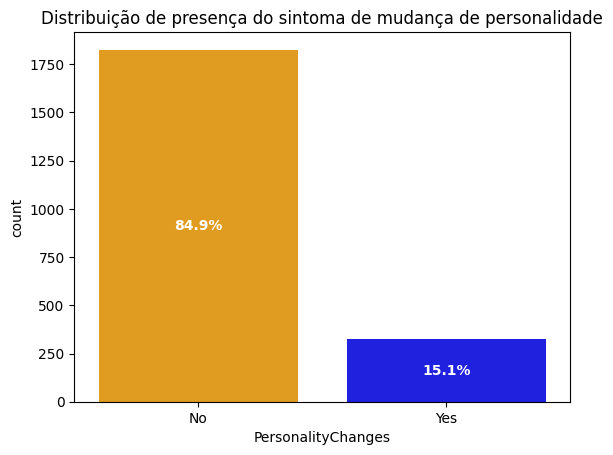

In [ ]:
#Distribuição dos pacientes que apresentaram mudança de personalidade.
ax = sns.countplot(x=df['PersonalityChanges'], hue=df['PersonalityChanges'], order = order_YesOrNo, palette = paleta_sn)

total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.text(
        p.get_x() + p.get_width() / 2,
        count / 2,
        f'{percentage:.1f}%',
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Distribuição de presença do sintoma de mudança de personalidade')
plt.show()

**PersonalityChanges**

O que a variável representa no contexto do dataset: Mudanças nas personalidades dos pacientes, que são frequentemente observadas em estágios iniciais e intermediários de doenças neurodegenerativas.

Tipo de distribuição: Variavél categórica que apresenta uma distribuição assimétrica com grande parte da população não apresentando mudança de personalidade.



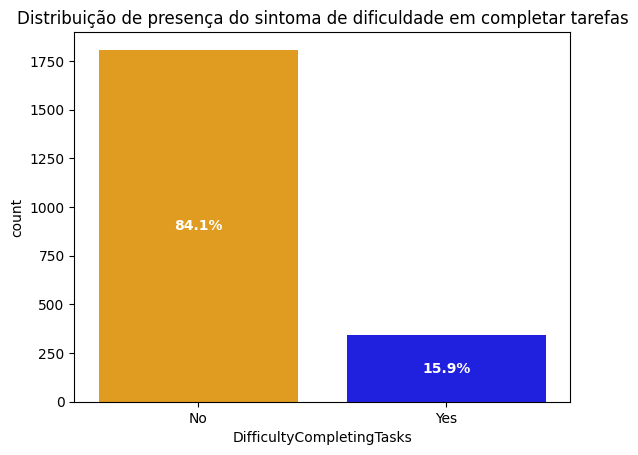

In [ ]:
#Distribuição dos pacientes que apresentaram dificuldade em completar tarefas.
ax = sns.countplot(x=df['DifficultyCompletingTasks'], hue=df['DifficultyCompletingTasks'], order = order_YesOrNo, palette = paleta_sn)

total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.text(
        p.get_x() + p.get_width() / 2,
        count / 2,
        f'{percentage:.1f}%',
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Distribuição de presença do sintoma de dificuldade em completar tarefas')
plt.show()

**DifficultyCompletingTasks**

O que a variável representa no contexto do dataset: Presença de dificuldades em completar tarefas dos pacientes, um sintoma de declínio cognitivo e perda de habilidades funcionais.

Tipo de distribuição: Variavél categórica que apresenta uma distribuição assimétrica com grande parte da população não apresentando dificuldades em tarefas.



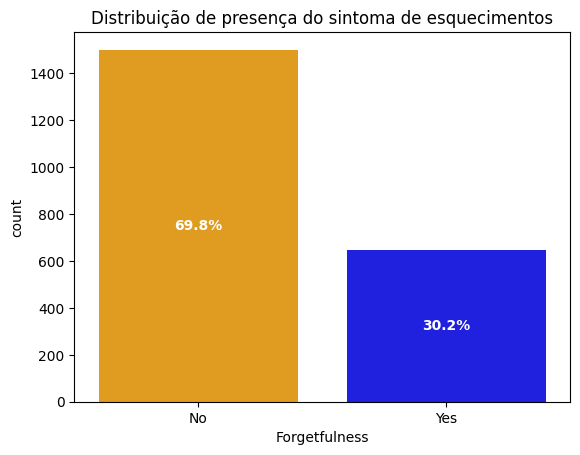

In [ ]:
#Distribuição dos pacientes quew apresentaram esquecimentos.
ax = sns.countplot(x=df['Forgetfulness'], hue=df['Forgetfulness'], order = order_YesOrNo, palette = paleta_sn)

total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.text(
        p.get_x() + p.get_width() / 2,
        count / 2,
        f'{percentage:.1f}%',
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Distribuição de presença do sintoma de esquecimentos')
plt.show()

**Forgetfulness**

O que a variável representa no contexto do dataset: Presença de esquecimento nos pacientes, que é um sintoma que mostra se o paciente mostras sinais de esquecimento de detalhes importantes sobre sua vida, podendo ser relacionado com o desenvolvimento do alzheimer ou com a senilidade.

Tipo de distribuição: Variavél categórica que apresenta uma distribuição assimétrica com boa parte da população não apresentando esquecimentos.



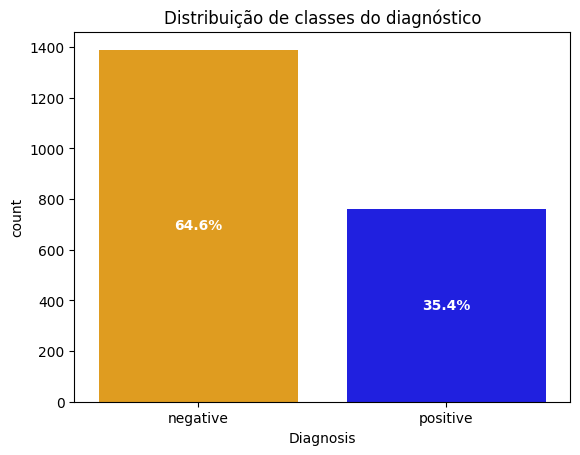

In [ ]:
#Distribuição dos pacientes por diagnóstico (igual a distribuição da variavel target na descrição estatistica).
ax = sns.countplot(x=df['Diagnosis'], hue=df['Diagnosis'], palette = paleta_dig)

total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.text(
        p.get_x() + p.get_width() / 2,
        count / 2,
        f'{percentage:.1f}%',
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Distribuição de classes do diagnóstico')
plt.show()

**Diagnosis**

O que a variável representa no contexto do dataset: Diagnóstico atribuido aos pacientes, indica se o paciente tem ou não a doença Alzheimer diagnosticada.

Tipo de distribuição: Variavél categórica que apresenta uma distribuição um pouco desbalanceada apresentando mais casos negativos do que positivos.


In [ ]:
# calculo de valores de curtose, simetria e categorização de tipo de distribução, usamos o código para termos uma ideia mais precisa dos tipos.
# Selecionar as colunas numéricas, excluindo as colunas 'PatientID' e 'DoctorInCharge'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [col for col in numeric_columns if col not in ['PatientID', 'DoctorInCharge']]

def distribution_type(skewness, kurt):
    if abs(kurt - 3) < 1:
        return "Distribuição Gaussiana (Normal)"
    elif kurt > 3:
        return "Distribuição Leptocúrtica (caudas pesadas)"
    elif kurt < 3:
        if skewness > 1:
            return "Distribuição Exponencial ou Log-normal (cauda à direita)"
        elif skewness < 1 and skewness > -1:
            return "Distribuição Uniforme (simétrica)"
        else:
            return "Distribuição com cauda à esquerda (negativa)"
    return "Distribuição Não Identificada"

for col in numeric_columns:
    print(f"\nVariável: {col}")

    skewness = skew(df_binario[col].dropna())
    kurt = kurtosis(df_binario[col].dropna())
    dist_type = distribution_type(skewness, kurt)

    print(f"Assimetria: {skewness:.2f}")
    print(f"Curtose: {kurt:.2f}")
    print(f"Tipo de distribuição: {dist_type}")


Variável: Age
Assimetria: 0.05
Curtose: -1.19
Tipo de distribuição: Distribuição Uniforme (simétrica)

Variável: BMI
Assimetria: -0.03
Curtose: -1.18
Tipo de distribuição: Distribuição Uniforme (simétrica)

Variável: AlcoholConsumption
Assimetria: 0.02
Curtose: -1.20
Tipo de distribuição: Distribuição Uniforme (simétrica)

Variável: PhysicalActivity
Assimetria: 0.04
Curtose: -1.18
Tipo de distribuição: Distribuição Uniforme (simétrica)

Variável: DietQuality
Assimetria: -0.01
Curtose: -1.23
Tipo de distribuição: Distribuição Uniforme (simétrica)

Variável: SleepQuality
Assimetria: -0.07
Curtose: -1.21
Tipo de distribuição: Distribuição Uniforme (simétrica)

Variável: SystolicBP
Assimetria: 0.01
Curtose: -1.20
Tipo de distribuição: Distribuição Uniforme (simétrica)

Variável: DiastolicBP
Assimetria: -0.05
Curtose: -1.23
Tipo de distribuição: Distribuição Uniforme (simétrica)

Variável: CholesterolTotal
Assimetria: -0.02
Curtose: -1.16
Tipo de distribuição: Distribuição Uniforme (simétr

## **Descrição das variaveis de interesse principal pós analise univariada que serão uitilizadas na analise multivariada.**

Nesta parte do projeto, selecionamos um subconjunto de variáveis especificas que são interessantes para a nossa análise, especialmente no contexto da investigação de fatores associados à saúde e ao diagnóstico clínico. Escolhemos estas variaveis baseados em hipoteses criadas sobre a base de dados e tambem observando as analises univariadas feitas acima.

A seguir, descrevemos as principais variáveis incluídas na nossa análise multivariada:

**Idade (Age):**
Representa a idade do paciente mostrada em anos qe pode variar entre 60 e 90 anos, ou seja uma população mais idosa. Esta variavel foi escolhida pois a idade é um dos principais fatores de risco para diversas condições de saúde, incluindo doenças cardiovasculares, declínio cognitivo e síndromes presentes em pessoas idosas. Além disso, ela pode estar associada a outras variáveis, como desempenho funcional e saúde mental, e é frequentemente utilizada como variável de controle em estudos clínicos, pois existem certas doenças que são mais comuns em pessoas idosas.

**Gênero (Gender):**
Esta variável indica o sexo biológico do individuo, categorizado como masculino ou feminino. O gênero é uma variável demográfica fundamental, pois diversas condições de saúde apresentam diferenças significativas entre homens e mulheres. Por exemplo, fatores hormonais, comportamentais e sociais podem influenciar o risco de doenças, desempenho cognitivo e até a resposta a tratamentos. Incluir essa variável na analise nos permitirá observar possíveis diferenças de padrão no desenvolvimento de alzheimer entre estes dois grupos de gêneros diferentes que estão distribuidos quase que uniformemente pela base.

**Consumo de Álcool (AlcoholConsumption):**
Refere-se ao nível e frequência do consumo de bebidas alcoólicas variando entre 0 e 20. Esta variavel foi escolhida pois o consumo excessivo pode estar associado a efeitos adversos ligados a déficits cognitivos, enquanto níveis moderados podem ter efeitos controversos na saúde. Essa variável é importante para entender se fatores comportamentais e de estilo de vida tem alguma influencia no diagnóstico de alzheimer.

**Tabagismo (Smoking):**
Indica se o indivíduo é fumante, ou não. O tabagismo é amplamente reconhecido como um fator de risco para uma série de doenças crônicas, incluindo câncer, doenças respiratórias, cardiovasculares e pode tambem acabar causando comprometimento cognitivo. A presença desse hábito pode potencializar riscos e afetar negativamente diversos indicadores clínicos e funcionais, sendo importante a sua análise para entender se este fator de estilo de vida, que é adotado por apenas uma parcela da população, tem alguma influencia no diagnóstico de alzheimer.


**Foi possivel perceber que estas 4 variaveis abaixo, que são relacionadas diretamente com métricas de funcionalidade cognitivo dos paciente, podem apresentar uma correlação maior com a variavel target do diagnostico quando comparada com as outras, por isso e pelos outros motivos que vamos explicar abaixo elas nos chamaram a atenção para a analise.**

**Avaliação Funcional (FunctionalAssessment):**
Esta variável mede a capacidade do indivíduo, em uma escala entre 0 e 10, de realizar atividades cotidianas que requerem planejamento, coordenação e força física. Mostra o nível de independência e funcionalidade geral, sendo uma métrica importante para identificar estágios de fragilidade ou perda de autonomia, especialmente em populações idosas, oque indica que esta variavel pode estar fortemente relacionada com o diagnostico.

**Queixas de Memória (MemoryComplaints):**
Representa relatos de problemas de memória, frequentemente utilizados como indicadores iniciais de comprometimento cognitivo leve. Essa variável pode se mostrar um preditor relevante de risco para progressão a quadros mais graves, especialmente quando associada a outros problemas.

**Problemas Comportamentais (BehavioralProblems):**
Envolve alterações emocionais ou comportamentais, como agitação, agressividade, depressão ou apatia. Esses sintomas podem estar associados a condições neuropsiquiátricas ou neurológicas e impactam diretamente a qualidade de vida e o cuidado com o paciente. A detecção desses problemas pode auxiliar em intervenções mais eficazes.

**Atividades de Vida Diária (ADL – Activities of Daily Living):**
É um teste que refere-se à capacidade do indivíduo em realizar tarefas básicas de autocuidado, como alimentação, banho, vestimenta e locomoção (podendo variara deo 0 a 10). É um indicador essencial do grau de independência funcional e frequentemente utilizado para avaliar a progressão de doenças crônicas, síndromes geriátricas e comprometimento neurológico, por isso é uma variavel adequada para analisarmos neste caso.

**Diagnóstico (Diagnosis):**
Representa a condição clínica do paciente em relação ao desenvolvimento da doença, podendo ser categorizada como positivo ou negativo. Esta é a variável target central na análise, pois define o grupo ao qual o paciente pertence em relação à presença do alzheimer. Ela será essencial para a analise multivariada, sendo a base de comparação para todas as analises que faremos neste trabalho de classificação.

# Multivariate data analysis

**Essa seção esta organizada da seguinte maneira:**

As hipoteses e justificativas formuladas antes da analise multivariada de cada uma das visualizações estão descritas antes dos seus respectivos códigos, e logo após a construção da visualização estão as discussões e achados relacionados aos dados e relações analisadas.



















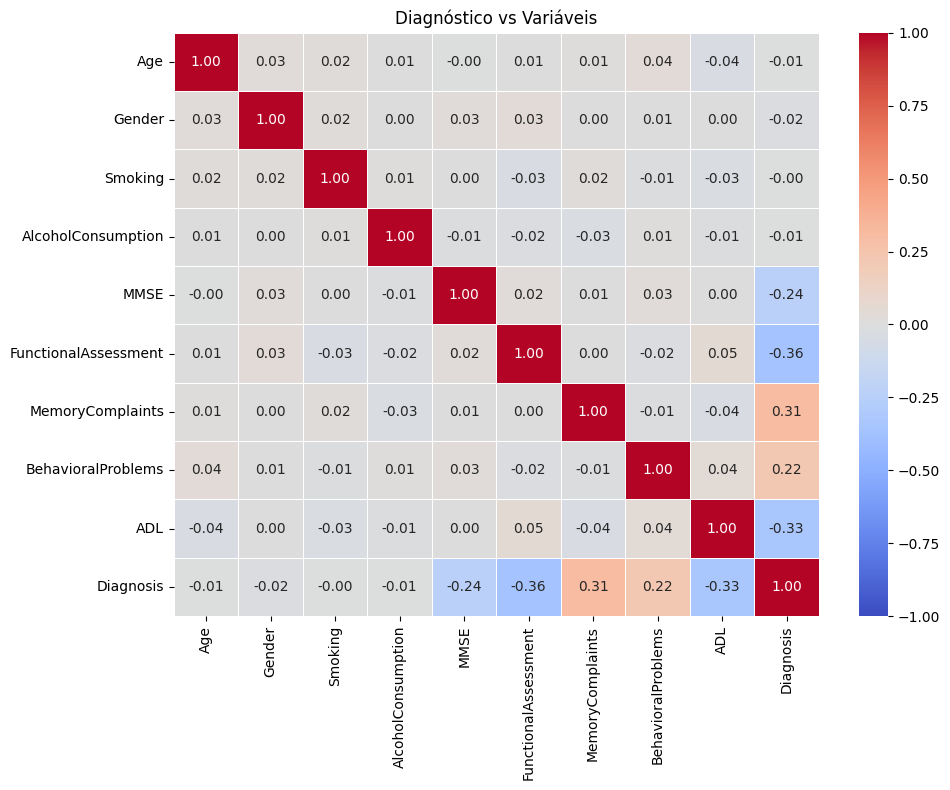

In [ ]:
#Heatmap da correlação das variaveis principais selecionadas, não existe uma hipotese formulada para ele, é apenas para uma visualização geral.
variaveis = ['Age', 'Gender', 'Smoking', 'AlcoholConsumption', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']


def plot_correlation_map(variables, title):
    data_subset = df_binario[variables + ['Diagnosis']]

    corr = data_subset.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_correlation_map(variaveis, 'Diagnóstico vs Variáveis')


**H1 – A idade mais avançada está associada a uma maior chance de diagnóstico positivo.**

Justificativa: O envelhecimento está diretamente relacionado ao risco de doenças de varios tipos. Análises podem mostrar se indivíduos diagnosticados positivamente tendem a ser mais velhos mesmo entre pessoas ja idosas.

Gráfico escolhido: Boxplot.

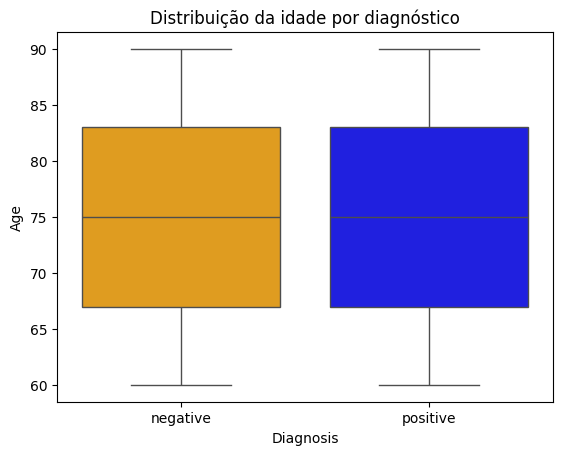

In [ ]:
# analise da distribuição de diagnosticos por idade
sns.boxplot(y=df['Age'], x=df['Diagnosis'], hue=df['Diagnosis'], palette = paleta_dig)
plt.title('Distribuição da idade por diagnóstico')
plt.show()

**Analise referente a H1:**

Descobertas:
Os gráficos de caixas da idade por diagnóstico sugerem que, a distribuição das idades por diagnóstico é claramente muito semelhante, nos mostrando que não há relação da idade com o desenvolvimento da doença.

Discussão:
As descobertas não concordam com a hipótese H1. Embora os dados sejam todos de pessoas ja idosas entre 60 e 90 anos, o gráfico sugere que a idade por si só, dentro deste intervalo, não é um fator determinante, já que a distribuição de diagnósticos positivos e negativos não é distinta ao longo de todas as faixas etárias.


---



**H2 – Há diferenças significativas entre gêneros na distribuição dos diagnósticos.**

Justificativa: Questões biológicas e comportamentais fazem com que homens e mulheres apresentem padrões distintos de risco e manifestação de doenças cognitivas ou funcionais.

Gráfico escolhido: Barras agrupadas.

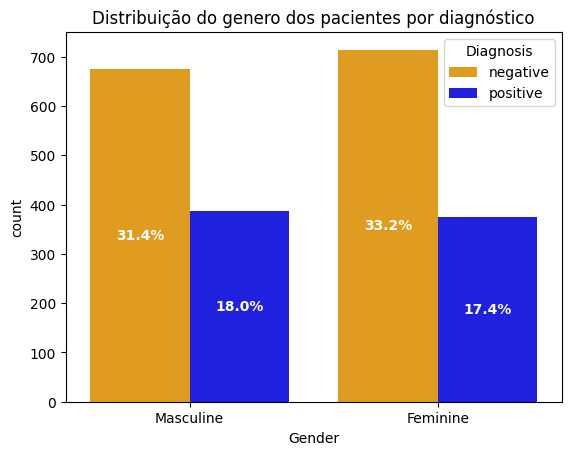

In [ ]:
# analise da distribuição de diagnosticos por genero
ax = sns.countplot(x=df['Gender'], hue=df['Diagnosis'], dodge=True, palette = paleta_dig)

total = len(df)

# Itera sobre cada barra do gráfico e adiciona a porcentagem em branco centralizada
for p in ax.patches:
    count = p.get_height()
    if count == 0: # por algum motivo aparecia um 0.0% aleantorio no meio do nada, fiz isso para tirar
        continue

    percentage = 100 * count / total
    ax.text(
        p.get_x() + p.get_width() / 2,
        count / 2,
        f'{percentage:.1f}%',
        ha='center', va='center',
        color='white',
        fontsize=10, fontweight='bold'
    )

plt.title('Distribuição do genero dos pacientes por diagnóstico')

plt.show()

**Analise referente a H2:**

Descobertas:
Os gráficos de barras agrupadas por gênero mostram que a apesar dos homens serem minoria na distribuição da base eles apresentam mais casos de diagnosticos positivos, enquanto as mulheres mesmo sendo maioria tem uma quantidade de diagnosticos positivos menores quando comparado com os homens, mas essa diferença não é expressiva sabendo que esta variavel genero na base é quase distribuida uniformemente e as mulheres são maioria por pouco e o numero de diagnósticos positivos entre os 2 não é tão discrepante.

Discussão:
As descobertas não concordam com a hipótese H2. Embora existam diferenças biológicas entre os gêneros, a análise sugere que gênero não é um fator significativo para o auxilio da detectação do diagnóstico positivo.

---



**H3 – A presença de queixas de memória está associada a maior incidência de diagnóstico positivo.**

Justificativa: Queixas de memória são frequentemente relatadas nos estágios iniciais do comprometimento cognitivo, mesmo antes da perda funcional.

Gráfico escolhido: Barras empilhadas.

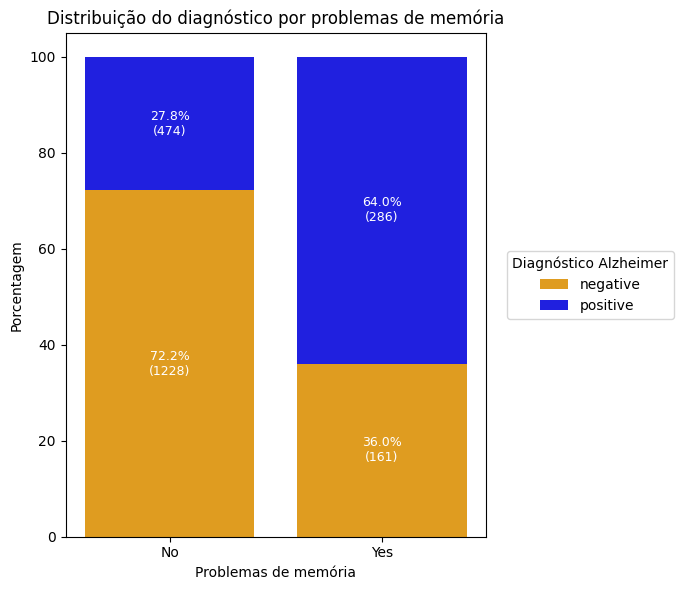

In [ ]:
# distribuição de reclamações de memória por diagnóstico

contagem = pd.crosstab(df['MemoryComplaints'], df['Diagnosis'])
porcentagem = contagem.div(contagem.sum(axis=1), axis=0) * 100

custom_palette = {
    'positive': '#2020df',  # azul
    'negative': '#df9c20'   # laranja
}

diagnosticos = ['negative', 'positive']

fig, ax = plt.subplots(figsize=(7, 6))

bottom = [0] * len(porcentagem)
for diag in diagnosticos:
    valores_percent = porcentagem[diag].values
    valores_abs = contagem[diag].values

    ax.bar(porcentagem.index, valores_percent, bottom=bottom, label=diag, color=custom_palette[diag])

    for j, (val_pct, val_abs) in enumerate(zip(valores_percent, valores_abs)):
        if val_pct > 0:
            ax.text(j, bottom[j] + val_pct / 2, f'{val_pct:.1f}%\n({val_abs})',
                    ha='center', va='center', color='white', fontsize=9)

    bottom = [bottom[j] + valores_percent[j] for j in range(len(valores_percent))]

ax.set_title('Distribuição do diagnóstico por problemas de memória')
ax.set_xlabel('Problemas de memória')
ax.set_ylabel('Porcentagem')
ax.tick_params(axis='x', rotation=0)
ax.legend(
    title='Diagnóstico Alzheimer',
    bbox_to_anchor=(1.05, 0.5),
    loc='center left',
    borderaxespad=0.
)

plt.tight_layout()
plt.show()

**Analise referente a H3:**

Descobertas:
Os gráficos de barras empilhadas mostram que, entre os indivíduos com queixas de memória, há uma maior incidência de diagnóstico positivo, com 64% dos indivíduos diagnosticados positivamente, o que reforça a importância das queixas de memória como sinal precoce para o desenvolvimento do alzheimer.

Discussão:
As descobertas concordam com a hipótese H3. A presença de queixas de memória está fortemente associada a um diagnóstico positivo, indicando que esses sintomas são um indicativo precoce de Alzheimer, como esperado na hipotese desenvolvida.


---



**H4 – Indivíduos com problemas comportamentais têm maior propensão a receber diagnóstico positivo.**

Justificativa: Comportamentos alterados como irritabilidade, apatia e desinibição são comuns em transtornos neurológicos e psiquiátricos relacionados à perda cognitiva, principalmente em populações com idades mais avançadas.

Gráfico escolhido: Barras empilhadas.

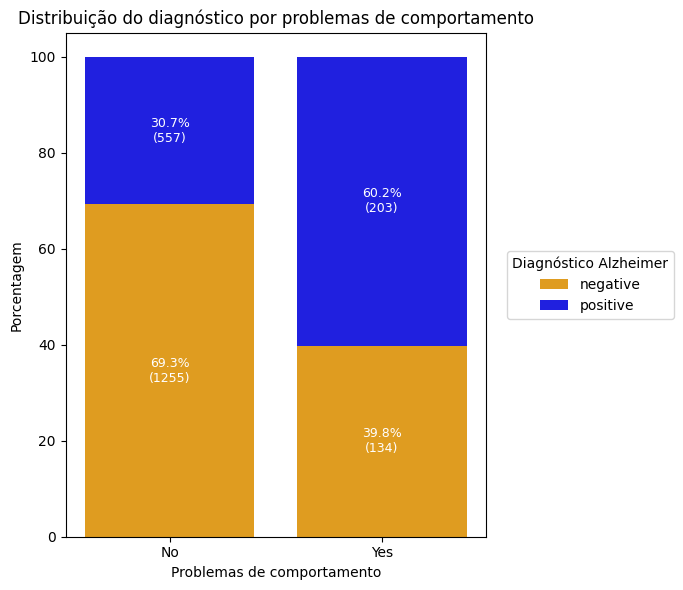

In [ ]:
# distribuição de problemas de comportamento por diagnóstico

contagem = pd.crosstab(df['BehavioralProblems'], df['Diagnosis'])
porcentagem = contagem.div(contagem.sum(axis=1), axis=0) * 100

custom_palette = {
    'positive': '#2020df',  # azul
    'negative': '#df9c20'   # laranja
}

diagnosticos = ['negative', 'positive']

fig, ax = plt.subplots(figsize=(7, 6))

bottom = [0] * len(porcentagem)
for diag in diagnosticos:
    valores_percent = porcentagem[diag].values
    valores_abs = contagem[diag].values

    ax.bar(porcentagem.index, valores_percent, bottom=bottom, label=diag, color=custom_palette[diag])

    for j, (val_pct, val_abs) in enumerate(zip(valores_percent, valores_abs)):
        if val_pct > 0:
            ax.text(j, bottom[j] + val_pct / 2, f'{val_pct:.1f}%\n({val_abs})',
                    ha='center', va='center', color='white', fontsize=9)

    bottom = [bottom[j] + valores_percent[j] for j in range(len(valores_percent))]

ax.set_title('Distribuição do diagnóstico por problemas de comportamento')
ax.set_xlabel('Problemas de comportamento')
ax.set_ylabel('Porcentagem')
ax.tick_params(axis='x', rotation=0)
ax.legend(
    title='Diagnóstico Alzheimer',
    bbox_to_anchor=(1.05, 0.5),
    loc='center left',
    borderaxespad=0.
)

plt.tight_layout()
plt.show()

**Analise referente a H4:**

Descobertas:
Os gráficos de barras empilhada mostram que 60.2% dos indivíduos com problemas comportamentais têm diagnóstico positivo, indicando uma associação entre problemas comportamentais e diagnóstico positivo.

Discussão:
As descobertas concordam com a hipótese H4. A presença de problemas comportamentais é uma característica comum entre os pacientes diagnosticados com Alzheimer, sugerindo que esses sintomas estão relacionados ao diagnóstico positivo da doença.


---



**H5 – A combinação de queixas de memória e problemas comportamentais aumenta a chance de diagnóstico positivo.**

Justificativa: A presença simultânea desses sintomas pode indicar um estágio mais avançado de declínio cognitivo, sendo um forte sinal de risco clínico, nos permitindo criar uma nova variavél para indicar este 'grupo de risco'.

Gráfico escolhido: Barras empilhadas.

In [ ]:
# Criar uma cópia do DataFrame original coloca uma nova coluna baseada na agregação dos 2sintomas analisadas anteriormente criando um "grupo de risco baseados nas variaveis MemoryComplaints e BehavioralProblems"
df_cmb= df.copy()

# Criar a nova coluna com valores 'Yes' ou 'No' com base nos critérios
df_cmb['combinacao_memory_behave'] = (
    (df_cmb['MemoryComplaints'] == 'Yes') &
    (df_cmb['BehavioralProblems'] == 'Yes')
).map({True: 'Yes', False: 'No'})

# Visualizar as primeiras linhas
df_cmb.head(3)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,combinacao_memory_behave
0,73,Masculine,Caucasian,Bachelors,22.927749,No,13.297218,6.327112,1.347214,9.025679,No,No,Yes,Yes,No,No,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,No,No,1.725883,No,No,No,Yes,No,negative,No
1,89,Masculine,Caucasian,None,26.827681,No,4.542524,7.619885,0.518767,7.151293,No,No,No,No,No,No,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,No,No,2.592424,No,No,No,No,Yes,negative,No
2,73,Masculine,Other,High School,17.795882,No,19.555085,7.844988,1.826335,9.673574,Yes,No,No,No,No,No,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,No,No,7.119548,No,Yes,No,Yes,No,negative,No


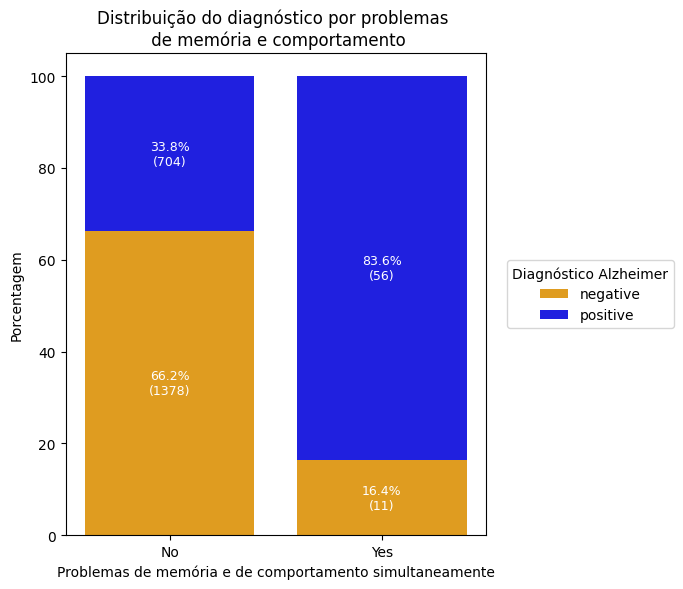

In [ ]:
# distribuição de reclamações de memória e problemas de comportamento por diagnóstico

contagem = pd.crosstab(df_cmb['combinacao_memory_behave'], df_cmb['Diagnosis'])
porcentagem = contagem.div(contagem.sum(axis=1), axis=0) * 100

custom_palette = {
    'positive': '#2020df',  # azul
    'negative': '#df9c20'   # laranja
}

diagnosticos = ['negative', 'positive']

fig, ax = plt.subplots(figsize=(7, 6))

bottom = [0] * len(porcentagem)
for diag in diagnosticos:
    valores_percent = porcentagem[diag].values
    valores_abs = contagem[diag].values

    ax.bar(porcentagem.index, valores_percent, bottom=bottom, label=diag, color=custom_palette[diag])

    for j, (val_pct, val_abs) in enumerate(zip(valores_percent, valores_abs)):
        if val_pct > 0:
            ax.text(j, bottom[j] + val_pct / 2, f'{val_pct:.1f}%\n({val_abs})',
                    ha='center', va='center', color='white', fontsize=9)

    bottom = [bottom[j] + valores_percent[j] for j in range(len(valores_percent))]

ax.set_title('Distribuição do diagnóstico por problemas \n de memória e comportamento')
ax.set_xlabel('Problemas de memória e de comportamento simultaneamente')
ax.set_ylabel('Porcentagem')
ax.tick_params(axis='x', rotation=0)
ax.legend(
    title='Diagnóstico Alzheimer',
    bbox_to_anchor=(1.05, 0.5),
    loc='center left',
    borderaxespad=0.
)

plt.tight_layout()
plt.show()

**Analise referente a H5:**

Descobertas:
Os gráficos de barras empilhadas mostram que entre os indivíduos que possuem tanto queixas de memória quanto problemas comportamentais, 83.6% foram diagnosticados positivamente. Esse resultado reforça a ideia de que a presença simultânea desses sintomas é um indicativo muito forte de Alzheimer.

Discussão:
As descobertas concordam com a hipótese H5. A combinação de queixas de memória e problemas comportamentais parece ser um forte fator de risco gigantesco para diagnóstico positivo, indicando um estágio mais avançado de comprometimento cognitivo.

Esta informação nos permitiu a criação de uma nova variavel, combinando a presença destas 2 caracteristicas e mostrando a proporção de diagnósticos positivos para os pacientes que atendem a esta nova variavél de 'grupo de risco de pessoas que apresentam problemas de memória e de comportamento'.


---




**H6 – Desempenho no teste funcional reduzido está relacionado ao diagnóstico positivo.**

Justificativa: A perda de habilidades funcionais está entre os principais critérios diagnósticos de demência e síndromes. A análise pode mostrar valores mais baixos entre os diagnosticados positivamente.

Gráfico escolhido: Boxplot com scatterplot.

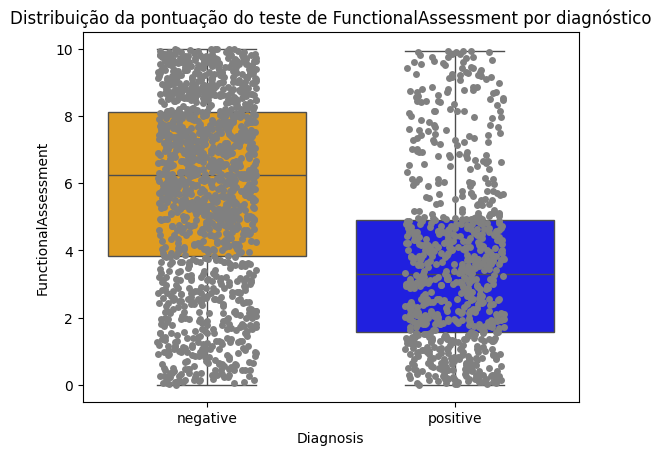

In [ ]:
# analise da distribuição de diagnosticos por pontuação no FunctionalAssessment
sns.stripplot(x=df['Diagnosis'], y=df['FunctionalAssessment'], jitter=0.2, color='gray')
sns.boxplot(x=df['Diagnosis'], y=df['FunctionalAssessment'], hue=df['Diagnosis'], data=df, palette = paleta_dig)

plt.title('Distribuição da pontuação do teste de FunctionalAssessment por diagnóstico')
plt.show()

**Analise referente a H6:**

Descobertas:
Os boxplot mostram que os indivíduos diagnosticados com Alzheimer têm pontuações abaixo da média no FunctionalAssessment. O gráfico revela uma diferença clara entre os pacientes diagnosticados negativamente e positivamente, com a pontuação de diagnóstico positivo mais concentrada em valores mais baixos de desempenho funcional.

Discussão:
As descobertas concordam com a hipótese H6. O desempenho funcional reduzido está fortemente relacionado com um diagnóstico positivo de Alzheimer, conforme esperado, já que a perda de habilidades funcionais é um dos principais critérios diagnósticos da doença.


---





**H7 – Indivíduos com maior dificuldade nas atividades de vida diária têm mais chance de diagnóstico positivo.**

Justificativa: A perda da autonomia em tarefas básicas é indicativa de progressão de comprometimento clínico, sendo altamente associada ao diagnóstico positivo.

Gráfico escolhido: Boxplot com scatterplot.

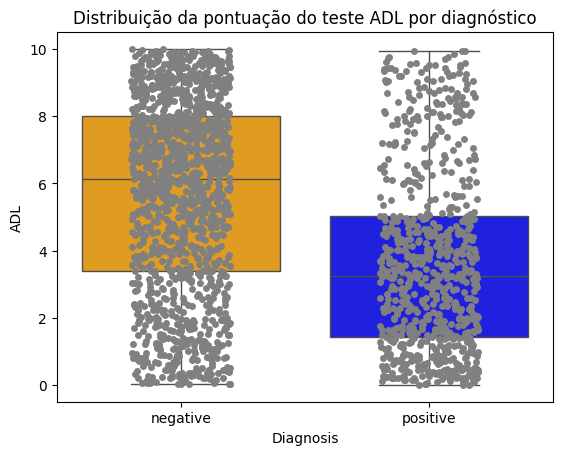

In [ ]:
# analise da distribuição de diagnosticos por pontuação no ADL
sns.stripplot(x=df['Diagnosis'], y=df['ADL'], jitter=0.2, color='gray')
sns.boxplot(x=df['Diagnosis'], y=df['ADL'], hue=df['Diagnosis'], data=df, palette = paleta_dig)

plt.title('Distribuição da pontuação do teste ADL por diagnóstico')
plt.show()

**Analise referente a H7:**

Descobertas:
Os boxplot mostram que os indivíduos com diagnóstico positivo apresentam pontuações abaixo da media na métrica ADL (Atividades da Vida Diária), com uma concentração significativa de pontuações baixas entre aqueles que tem um diagnóstico positivo para alzheimer.

Discussão:
As descobertas concordam com a hipótese H7. A dificuldade nas atividades de vida diária (ADL) está claramente associado a um diagnóstico positivo para Alzheimer, confirmando a relação entre a perda de autonomia e o desenvolvimento do alzheimer.


---




**H8 – A combinação de resultados abaixo da média em testes de FunctionalAssessment e ADL aumenta a chance de diagnóstico positivo.**

Justificativa: A presença simultânea de Scores baixos nestas duas métricas pode indicar um estágio mais avançado de declínio cognitivo, sendo um forte sinal de risco, nos permitindo a criação de outra variavel de 'grupo de risco' para estas pessoas.

Gráfico escolhido: Barras empilhadas.

In [ ]:
# Criar uma cópia do DataFrame original coloca uma nova coluna baseada na agregação das 4 medidas de funçao cognitiva analisadas anteriormente criando um "grupo de risco"
df_adl_fa = df.copy()

# Criar a nova coluna com valores 'Yes' ou 'No' com base nos critérios
df_adl_fa['combinacao_scores'] = (
    (df_adl_fa['FunctionalAssessment'] <= 5) &
    (df_adl_fa['ADL'] <= 5)
).map({True: 'Yes', False: 'No'})

# Visualizar as primeiras linhas

df_adl_fa.head(3)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,combinacao_scores
0,73,Masculine,Caucasian,Bachelors,22.927749,No,13.297218,6.327112,1.347214,9.025679,No,No,Yes,Yes,No,No,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,No,No,1.725883,No,No,No,Yes,No,negative,No
1,89,Masculine,Caucasian,None,26.827681,No,4.542524,7.619885,0.518767,7.151293,No,No,No,No,No,No,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,No,No,2.592424,No,No,No,No,Yes,negative,No
2,73,Masculine,Other,High School,17.795882,No,19.555085,7.844988,1.826335,9.673574,Yes,No,No,No,No,No,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,No,No,7.119548,No,Yes,No,Yes,No,negative,No


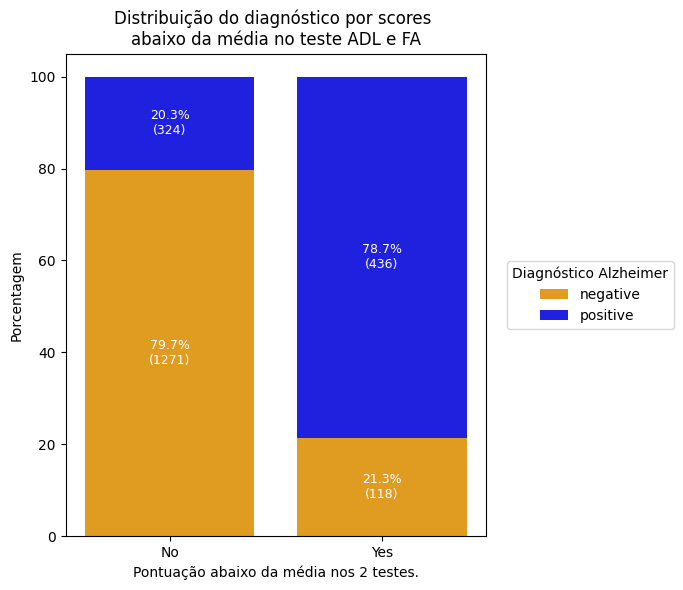

In [ ]:
# distribuição de notas abaixo das édias nos testes ADL e function assessment comparado com o diagnóstico

contagem = pd.crosstab(df_adl_fa['combinacao_scores'], df_adl_fa['Diagnosis'])
porcentagem = contagem.div(contagem.sum(axis=1), axis=0) * 100

custom_palette = {
    'positive': '#2020df',  # azul
    'negative': '#df9c20'   # laranja
}

diagnosticos = ['negative', 'positive']

fig, ax = plt.subplots(figsize=(7, 6))

bottom = [0] * len(porcentagem)
for diag in diagnosticos:
    valores_percent = porcentagem[diag].values
    valores_abs = contagem[diag].values

    ax.bar(porcentagem.index, valores_percent, bottom=bottom, label=diag, color=custom_palette[diag])

    for j, (val_pct, val_abs) in enumerate(zip(valores_percent, valores_abs)):
        if val_pct > 0:
            ax.text(j, bottom[j] + val_pct / 2, f'{val_pct:.1f}%\n({val_abs})',
                    ha='center', va='center', color='white', fontsize=9)

    bottom = [bottom[j] + valores_percent[j] for j in range(len(valores_percent))]

ax.set_title('Distribuição do diagnóstico por scores \nabaixo da média no teste ADL e FA')
ax.set_xlabel('Pontuação abaixo da média nos 2 testes.')
ax.set_ylabel('Porcentagem')
ax.tick_params(axis='x', rotation=0)
ax.legend(
    title='Diagnóstico Alzheimer',
    bbox_to_anchor=(1.05, 0.5),
    loc='center left',
    borderaxespad=0.
)

plt.tight_layout()
plt.show()

**Analise referente a H8:**

Descobertas:
Os gráficos de barras empilhadas revelam que 78.7% dos indivíduos com resultados abaixo da média em FunctionalAssessment e ADL foram diagnosticados positivamente. Essa associação indica que pontuações abaixo da média nas duas métricas combinadas aumentam significativamente a probabilidade de diagnóstico positivo para Alzheimer.

Discussão:
As descobertas concordam com a hipótese H8. A presença simultânea de comprometimento funcional e em ADL é um forte indicador de risco para diagnóstico positivo de Alzheimer, sugerindo que esses dois fatores combinados são sinais de que o alzheimer provavelmente esta presente.

Esta informação nos permitiu a criação de uma nova variavel, combinando a presença destas 2 caracteristicas e mostrando a proporção de diagnósticos positivos para os pacientes que atendem a esta nova variavél de 'grupo de risco' relacionado a pessoas com notas abaixo da média em testes cognitivos'.

---



**H9 – Fumantes apresentam maior proporção de diagnóstico positivo em comparação com não fumantes.**

Justificativa: O tabagismo é um fator de risco para diversas doenças crônicas, incluindo alterações neurológicas e cognitivas. A análise poderá mostrar maior prevalência de diagnósticos positivos entre fumantes.

Gráfico escolhido: Barras agrupadas.

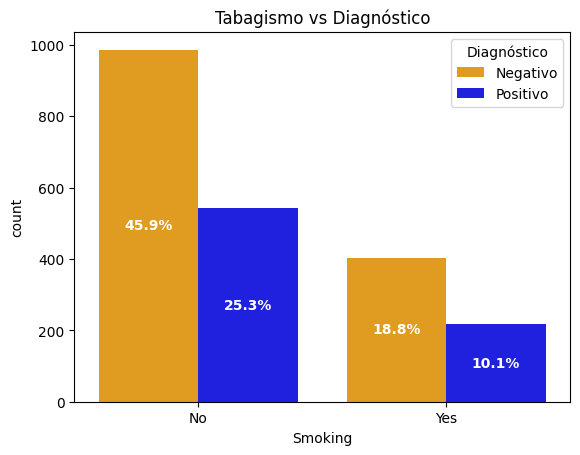

In [ ]:
# analise da distribuição de diagnosticos por presença ou nao de tabagismo
ax = sns.countplot(x=df['Smoking'], hue=df['Diagnosis'], palette = paleta_dig)
plt.title('Tabagismo vs Diagnóstico')
plt.legend(title='Diagnóstico', labels=['Negativo', 'Positivo'])

total = len(df)

for p in ax.patches:
    count = p.get_height()
    if count == 0:
        continue

    percentage = 100 * count / total

    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() / 2,
        f'{percentage:.1f}%',
        ha='center', va='center',
        color='white',
        fontsize=10, fontweight='bold'
    )


plt.show()

**Analise referente a H9:**

Descobertas:
Os gráfico mostram que, entre os fumantes, a proporção de diagnóstico negativo é maior, mas também existe uma proporção considerável de diagnóstico positivo. O gráfico sugere que o tabagismo não é fortemente associado a um maior diagnóstico positivo de Alzheimer.

Discussão:
As descobertas não concordam com a hipótese H9, pois embora haja um número significativo de fumantes com diagnóstico positivo, a associação entre o tabagismo e o diagnóstico positivo não da um indicativo de ser forte.

---



**H10 – Maior consumo de álcool está associado a maior probabilidade de diagnóstico positivo.**

Justificativa: O álcool pode afetar negativamente a função cerebral, o sono e o comportamento. A analise irá mostrar se existe associação do uso de alcool a longo prazo com o diagnóstico.

Gráfico escolhido: Boxplot e scatterplot.

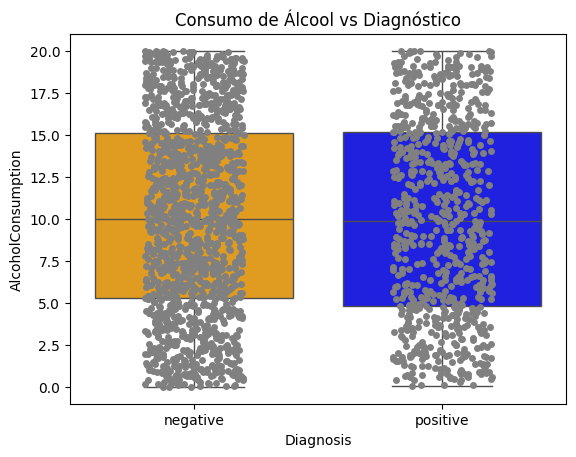

In [ ]:
# analise da distribuição de diagnosticos por quantidade de consumo de alcol

sns.stripplot(x=df['Diagnosis'], y=df['AlcoholConsumption'], jitter=0.2, color='gray')
sns.boxplot(x=df['Diagnosis'], y=df['AlcoholConsumption'], hue=df['Diagnosis'], data=df, palette = paleta_dig)

plt.title('Consumo de Álcool vs Diagnóstico')
plt.show()

**Analise referente a H10:**

Descobertas:
Os boxplot sugerem que o consumo de álcool entre indivíduos diagnosticados com Alzheimer não é significativamente diferente dos não diagnosticados com alzheimer. O gráfico não mostra uma distribuição distinta entre os grupos positivo e negativo, o que indica que o consumo de álcool não é um fator determinante para o diagnóstico.

Discussão:
As descobertas não concordam com a hipótese H10, pois a análise sugere que o consumo de álcool não tem uma associação tão clara com o diagnóstico positivo de Alzheimer. Embora o consumo de álcool possa ter impactos negativos na saúde mental a longo prazo, não a indicações de relação com aumento de casos de alzheimer.

---



In [ ]:
# Esta parte não será considerada na entrega do checkpoint, pois quando mostramos ao professor na aula ele disse que seria melhor entregarmos comentado
# ja que não tivemos aula sobre isso, mas em todo caso vamos deixar o trecho de código aqui.
# Projeção dos dados no espaço dos dois primeiros componentes principais (PC1 e PC2)

#numerical_cols = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
#                  'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
#                 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']

#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(df_binario[numerical_cols])

#pca = PCA(n_components=2)
#pca_components = pca.fit_transform(scaled_data)

#pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

#plt.figure(figsize=(8,6))
#sns.scatterplot(x='PC1', y='PC2', hue=df['Diagnosis'], data=pca_df, palette='Set1')
#plt.title('PCA: Componentes Principais vs Diagnóstico')
#plt.xlabel('Primeiro Componente Principal')
#plt.ylabel('Segundo Componente Principal')
#plt.show()

#print(f'Variância explicada pelos componentes principais: {pca.explained_variance_ratio_}')

# Final Plots (Effective Data Visualization)

**Essa seção esta organizada da seguinte maneira:**

A visualização modificada seguindo as recomendações da Data-Viz-Checklist-2024, fornecida pelo professor, estão presentes e abaixo de cada uma delas existe uma célula de texto fazendo uma breve descrição dos elementos gráficos incluidos e das informações que são possiveis de retirar da interpretação do gráfico.



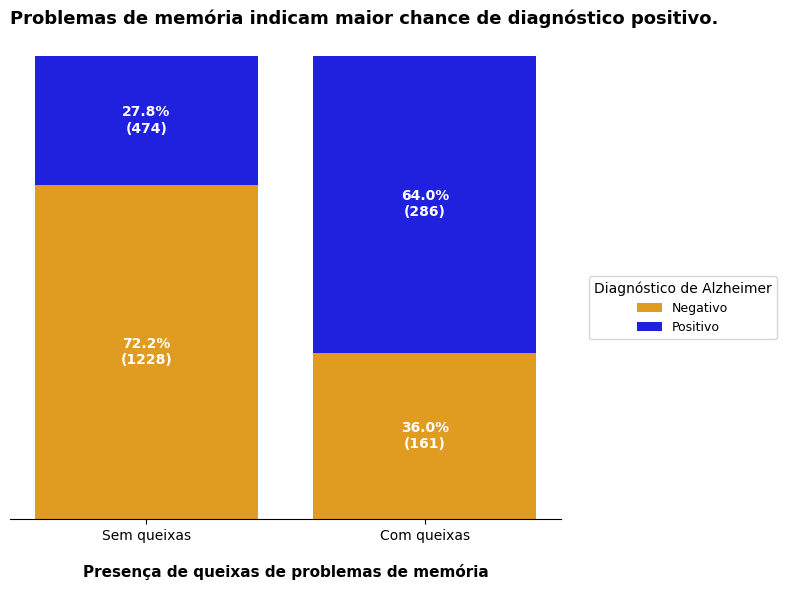

In [ ]:
# distribuição de reclamações de memória por diagnóstico
contagem = pd.crosstab(df['MemoryComplaints'], df['Diagnosis'])
porcentagem = contagem.div(contagem.sum(axis=1), axis=0) * 100

custom_palette = {
    'positive': '#2020df',
    'negative': '#df9c20'
}

diagnosticos = ['negative', 'positive']
labels_x = ['Sem queixas', 'Com queixas']

fig, ax = plt.subplots(figsize=(8, 6))

bottom = [0] * len(porcentagem)
for diag in diagnosticos:
    valores_percent = porcentagem[diag].values
    valores_abs = contagem[diag].values

    ax.bar(
        labels_x, valores_percent,
        bottom=bottom,
        label='Negativo' if diag == 'negative' else 'Positivo',
        color=custom_palette[diag]
    )

    for j, (val_pct, val_abs) in enumerate(zip(valores_percent, valores_abs)):
        if val_pct > 0:
            ax.text(
                j, bottom[j] + val_pct / 2,
                f'{val_pct:.1f}%\n({val_abs})',
                ha='center', va='center',
                color='white', fontsize=10, fontweight='bold'
            )

    bottom = [bottom[j] + valores_percent[j] for j in range(len(valores_percent))]

ax.set_yticks([])
ax.set_ylabel("")
ax.set_xlabel("Presença de queixas de problemas de memória", fontsize=11, labelpad=15, weight='bold')
ax.set_title('Problemas de memória indicam maior chance de diagnóstico positivo.', loc='left', fontsize=13, weight='bold')

ax.legend(
    title='Diagnóstico de Alzheimer',
    bbox_to_anchor=(1.05, 0.5),
    loc='upper left',
    borderaxespad=0.,
    fontsize=9
)

ax.tick_params(axis='x', labelsize=10)
ax.spines[['top', 'right', 'left']].set_visible(False)

plt.tight_layout()
plt.show()

**Descrição dos elementos gráficos:**

Barras empilhadas normalizadas (100%), permitindo fácil comparação proporcional entre grupos.

Números centralizados nas seções das barras, exibindo porcentagem + valor absoluto, ajudando a leitura direta.

Cores contrastantes para cada categoria de diagnóstico (laranja para negativo e azul para positivo), garantindo acessibilidade visual.

Legenda posicionada ao lado direito, fora da área do gráfico, mantendo o foco nos dados.

Título em negrito, criando uma hierarquia visual clara e mostrando a ideia central do gráfico.

Rótulo do eixo X com descrição completa, sem poluir visualmente a base do gráfico.

Ausência do eixo Y, substituído por rótulos internos, o que evita duplicidade de informação e reduz a poluição visual.

**Descrição das principais informações retiradas do gráfico:**

Pacientes com queixas de memória têm maior chance de diagnóstico positivo para Alzheimer. O gráfico mostra que 64% dos que relataram queixas foram diagnosticados positivamente, enquanto entre os que não relataram, apenas 27,8% tiveram esse diagnóstico. Isso mostra uma forte associação entre queixas de memória e a presença da doença.

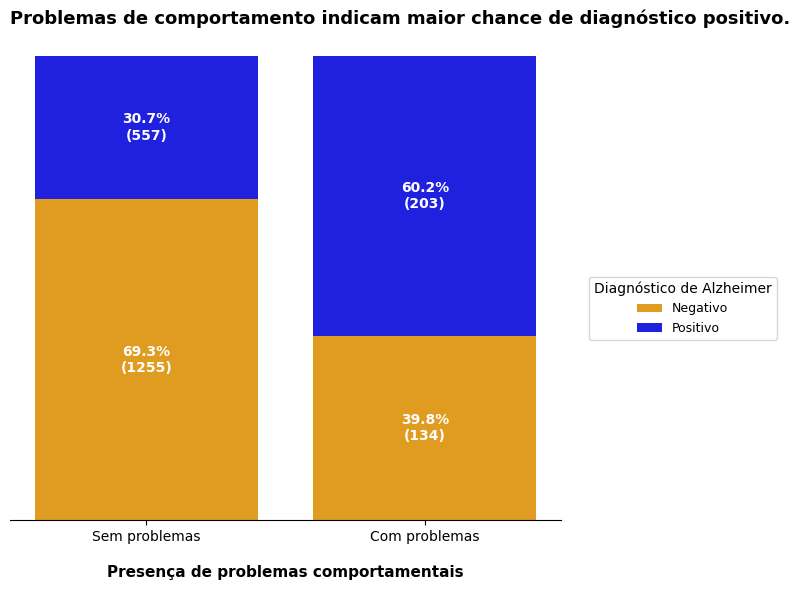

In [ ]:
# distribuição de problemas de comportamento por diagnóstico
contagem = pd.crosstab(df['BehavioralProblems'], df['Diagnosis'])
porcentagem = contagem.div(contagem.sum(axis=1), axis=0) * 100

custom_palette = {
    'positive': '#2020df',
    'negative': '#df9c20'
}

diagnosticos = ['negative', 'positive']
labels_x = ['Sem problemas', 'Com problemas']

fig, ax = plt.subplots(figsize=(8, 6))

bottom = [0] * len(porcentagem)
for diag in diagnosticos:
    valores_percent = porcentagem[diag].values
    valores_abs = contagem[diag].values

    ax.bar(
        labels_x, valores_percent,
        bottom=bottom,
        label='Negativo' if diag == 'negative' else 'Positivo',
        color=custom_palette[diag]
    )

    for j, (val_pct, val_abs) in enumerate(zip(valores_percent, valores_abs)):
        if val_pct > 0:
            ax.text(
                j, bottom[j] + val_pct / 2,
                f'{val_pct:.1f}%\n({val_abs})',
                ha='center', va='center',
                color='white', fontsize=10, fontweight='bold'
            )

    bottom = [bottom[j] + valores_percent[j] for j in range(len(valores_percent))]

ax.set_yticks([])
ax.set_ylabel("")
ax.set_xlabel("Presença de problemas comportamentais", fontsize=11, labelpad=15, weight='bold',)
ax.set_title('Problemas de comportamento indicam maior chance de diagnóstico positivo.', loc='left', fontsize=13, weight='bold')

ax.legend(
    title='Diagnóstico de Alzheimer',
    bbox_to_anchor=(1.05, 0.5),
    loc='upper left',
    borderaxespad=0.,
    fontsize=9
)

ax.tick_params(axis='x', labelsize=10)
ax.spines[['top', 'right', 'left']].set_visible(False)

plt.tight_layout()
plt.show()

**Descrição dos elementos gráficos:**

Barras empilhadas normalizadas (100%), permitindo fácil comparação proporcional entre grupos.

Números centralizados nas seções das barras, exibindo porcentagem + valor absoluto, ajudando a leitura direta.

Cores contrastantes para cada categoria de diagnóstico (laranja para negativo e azul para positivo), garantindo acessibilidade visual.

Legenda posicionada ao lado direito, fora da área do gráfico, mantendo o foco nos dados.

Título em negrito, criando uma hierarquia visual clara e mostrando a ideia central do gráfico.

Rótulo do eixo X com descrição completa, sem poluir visualmente a base do gráfico.

Ausência do eixo Y, substituído por rótulos internos, o que evita duplicidade de informação e reduz a poluição visual.

**Descrição das principais informações retiradas do gráfico:**

Pacientes com problemas comportamentais apresentam maior proporção de diagnósticos positivos para Alzheimer. No gráfico, 60,2% dos que possuem problemas comportamentais foram diagnosticados positivamente, enquanto entre os que não apresentam esses problemas, apenas 30,7% receberam o diagnóstico positivo. Isso indica uma forte associação entre alterações comportamentais e a presença da doença.

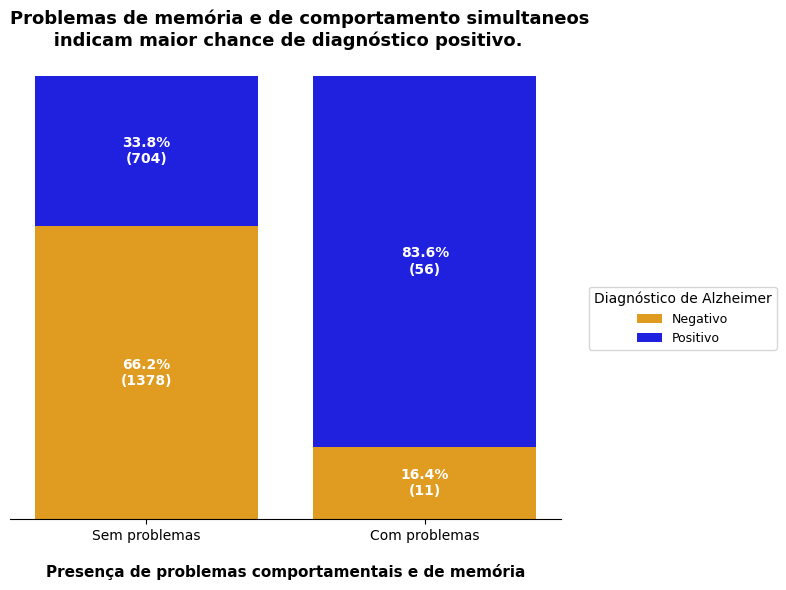

In [ ]:
# distribuição de reclamações de memória e problemas de comportamento por diagnóstico
contagem = pd.crosstab(df_cmb['combinacao_memory_behave'], df_cmb['Diagnosis'])
porcentagem = contagem.div(contagem.sum(axis=1), axis=0) * 100


custom_palette = {
    'positive': '#2020df',
    'negative': '#df9c20'
}

diagnosticos = ['negative', 'positive']
labels_x = ['Sem problemas', 'Com problemas']

fig, ax = plt.subplots(figsize=(8, 6))

bottom = [0] * len(porcentagem)
for diag in diagnosticos:
    valores_percent = porcentagem[diag].values
    valores_abs = contagem[diag].values

    ax.bar(
        labels_x, valores_percent,
        bottom=bottom,
        label='Negativo' if diag == 'negative' else 'Positivo',
        color=custom_palette[diag]
    )

    for j, (val_pct, val_abs) in enumerate(zip(valores_percent, valores_abs)):
        if val_pct > 0:
            ax.text(
                j, bottom[j] + val_pct / 2,
                f'{val_pct:.1f}%\n({val_abs})',
                ha='center', va='center',
                color='white', fontsize=10, fontweight='bold'
            )

    bottom = [bottom[j] + valores_percent[j] for j in range(len(valores_percent))]

ax.set_yticks([])
ax.set_ylabel("")
ax.set_xlabel("Presença de problemas comportamentais e de memória", fontsize=11, labelpad=15, weight='bold')
ax.set_title('Problemas de memória e de comportamento simultaneos \n       indicam maior chance de diagnóstico positivo.', loc='left', fontsize=13, weight='bold')

ax.legend(
    title='Diagnóstico de Alzheimer',
    bbox_to_anchor=(1.05, 0.5),
    loc='upper left',
    borderaxespad=0.,
    fontsize=9
)

ax.tick_params(axis='x', labelsize=10)
ax.spines[['top', 'right', 'left']].set_visible(False)

plt.tight_layout()
plt.show()

**Descrição dos elementos gráficos:**

Barras empilhadas normalizadas (100%), permitindo fácil comparação proporcional entre grupos.

Números centralizados nas seções das barras, exibindo porcentagem + valor absoluto, ajudando a leitura direta.

Cores contrastantes para cada categoria de diagnóstico (laranja para negativo e azul para positivo), garantindo acessibilidade visual.

Legenda posicionada ao lado direito, fora da área do gráfico, mantendo o foco nos dados.

Título em negrito, criando uma hierarquia visual clara e mostrando a ideia central do gráfico.

Rótulo do eixo X com descrição completa, sem poluir visualmente a base do gráfico.

Ausência do eixo Y, substituído por rótulos internos, o que evita duplicidade de informação e reduz a poluição visual.

**Descrição das principais informações retiradas do gráfico:**

Pacientes que apresentam simultaneamente problemas de memória e de comportamento têm uma chance ainda mais elevada de diagnóstico positivo para Alzheimer. O gráfico mostra que 83,6% dos indivíduos com ambos os tipos de queixas foram diagnosticados positivamente, enquanto entre aqueles sem esses problemas simultaneamente, apenas 33,8% receberam o mesmo diagnóstico. Isso nos mostra que a combinação de sintomas de problemas de memória e comportamentais estão fortemente associada à presença da doença.

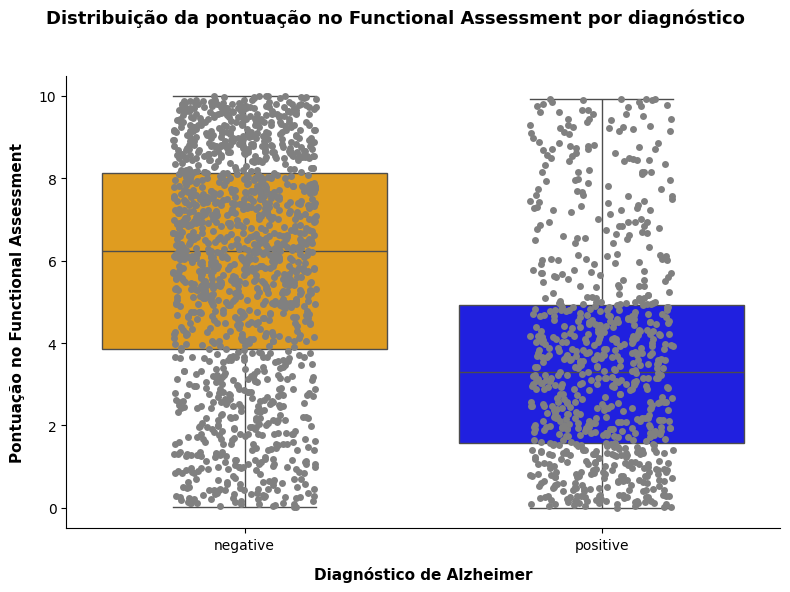

In [ ]:
# analise da distribuição de diagnosticos por pontuação no FunctionalAssessment
fig, ax = plt.subplots(figsize=(8, 6))

sns.stripplot(
    x=df['Diagnosis'],
    y=df['FunctionalAssessment'],
    jitter=0.2,
    color='gray',
    ax=ax
)

sns.boxplot(
    x=df['Diagnosis'],
    y=df['FunctionalAssessment'],
    hue=df['Diagnosis'],
    data=df,
    palette=paleta_dig,
    legend=False,
    ax=ax
)

fig.suptitle(
    'Distribuição da pontuação no Functional Assessment por diagnóstico',
    fontsize=13,
    weight='bold',
    ha='center'
)
ax.set_xlabel('Diagnóstico de Alzheimer', fontsize=11, labelpad=10, weight='bold')
ax.set_ylabel('Pontuação no Functional Assessment', fontsize=11, labelpad=10, weight='bold')

ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(labelsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Descrição dos elementos gráficos:**

Sobreposição visual clara entre o boxplot e os pontos individuais, permitindo ver estatísticas e dados reais ao mesmo tempo.

Pontos cinza no stripplot trazem informações sobre a distribuição de pontuações e evitam sobrecarga de cor.

Cores distintas por diagnóstico no boxplot, facilitando a identificação de grupos.

Título centralizado e descritivo, ajudando na interpretação da ideia central do gráfico.

Eixos com rótulos claros e fonte em destaque, facilitando a leitura.

Remoção de elementos, como bordas e grids excessivas.

Layout limpo e espaçado, com margens bem ajustadas evitando sobreposição de textos.

**Descrição das principais informações retiradas do gráfico:**

O gráfico mostra a distribuição da pontuação no Functional Assessment de acordo com o diagnóstico de Alzheimer, pacientes com diagnóstico negativo tendem a apresentar concentração de pontuações mais altas. Já aqueles com diagnóstico positivo apresentam uma concentração de pontuações visivelmente mais baixas, reforçando a relação entre pontuações baixas nas métricas de avaliação de desempenho funcional e diagnóstico positivo da doença.

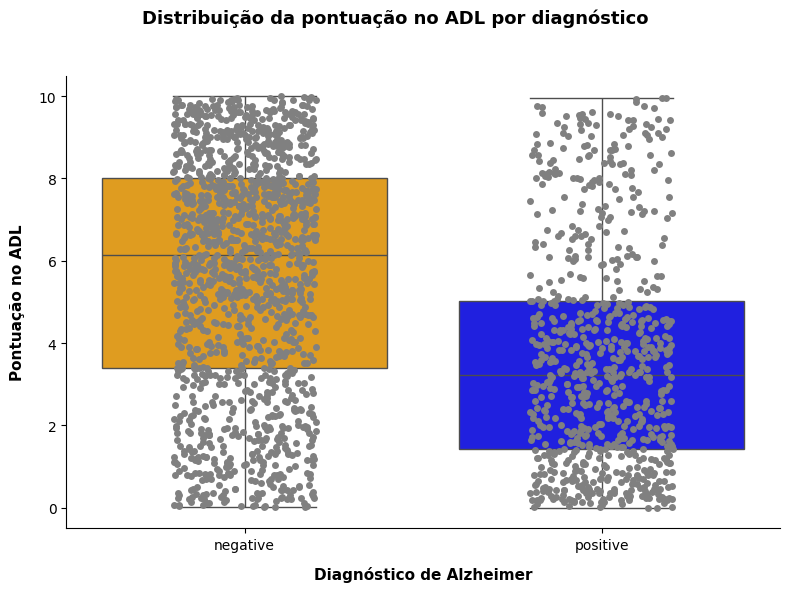

In [ ]:
# analise da distribuição de diagnosticos por pontuação no ADL
fig, ax = plt.subplots(figsize=(8, 6))

sns.stripplot(
    x=df['Diagnosis'],
    y=df['ADL'],
    jitter=0.2,
    color='gray',
    ax=ax
)

sns.boxplot(
    x=df['Diagnosis'],
    y=df['ADL'],
    hue=df['Diagnosis'],
    data=df,
    palette=paleta_dig,
    legend=False,
    ax=ax
)

fig.suptitle(
    'Distribuição da pontuação no ADL por diagnóstico',
    fontsize=13,
    weight='bold',
    ha='center'
)
ax.set_xlabel('Diagnóstico de Alzheimer', fontsize=11, labelpad=10, weight='bold')
ax.set_ylabel('Pontuação no ADL', fontsize=11, labelpad=10, weight='bold')

ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(labelsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Descrição dos elementos gráficos:**

Sobreposição visual clara entre o boxplot e os pontos individuais, permitindo ver estatísticas e dados reais ao mesmo tempo.

Pontos cinza no stripplot trazem informações sobre a distribuição de pontuações e evitam sobrecarga de cor.

Cores distintas por diagnóstico no boxplot, facilitando a identificação de grupos.

Título centralizado e descritivo, ajudando na interpretação da ideia central do gráfico.

Eixos com rótulos claros e fonte em destaque, facilitando a leitura.

Remoção de elementos, como bordas e grids excessivas.

Layout limpo e espaçado, com margens bem ajustadas evitando sobreposição de textos.

**Descrição das principais informações retiradas do gráfico:**

O gráfico mostra a distribuição da pontuação no teste ADL de acordo com o diagnóstico de Alzheimer, pacientes com diagnóstico negativo tendem a apresentar concentração de pontuações mais altas. Já aqueles com diagnóstico positivo apresentam uma concentração de pontuações visivelmente mais baixas, reforçando a relação entre pontuações baixas nas métricas de avaliação de desempenho em atividades cotidianas e diagnóstico positivo da doença.

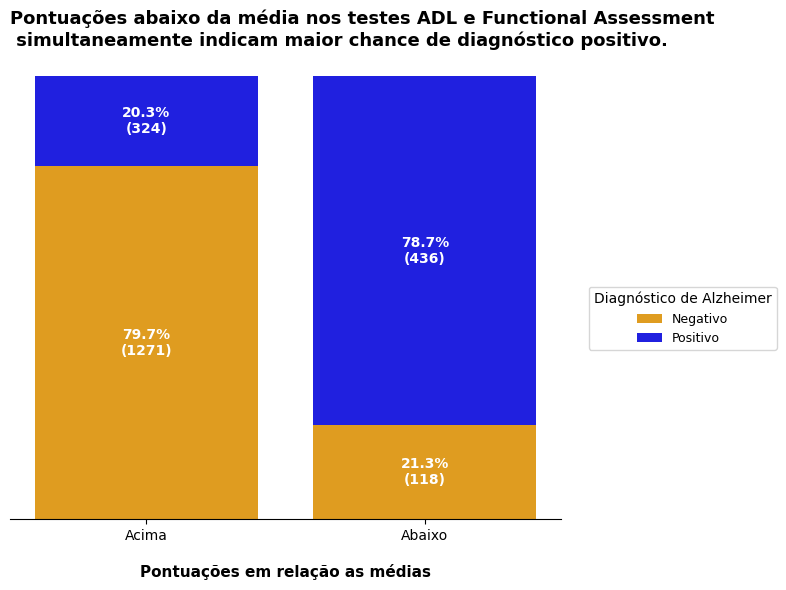

In [ ]:
# distribuição notas abaixo da média no teste ADL e Function  por diagnóstico

contagem = pd.crosstab(df_adl_fa['combinacao_scores'], df_adl_fa['Diagnosis'])
porcentagem = contagem.div(contagem.sum(axis=1), axis=0) * 100

custom_palette = {
    'positive': '#2020df',
    'negative': '#df9c20'
}

diagnosticos = ['negative', 'positive']
labels_x = ['Acima', 'Abaixo']

fig, ax = plt.subplots(figsize=(8, 6))

bottom = [0] * len(porcentagem)
for diag in diagnosticos:
    valores_percent = porcentagem[diag].values
    valores_abs = contagem[diag].values

    ax.bar(
        labels_x, valores_percent,
        bottom=bottom,
        label='Negativo' if diag == 'negative' else 'Positivo',
        color=custom_palette[diag]
    )

    for j, (val_pct, val_abs) in enumerate(zip(valores_percent, valores_abs)):
        if val_pct > 0:
            ax.text(
                j, bottom[j] + val_pct / 2,
                f'{val_pct:.1f}%\n({val_abs})',
                ha='center', va='center',
                color='white', fontsize=10, fontweight='bold'
            )

    bottom = [bottom[j] + valores_percent[j] for j in range(len(valores_percent))]

ax.set_yticks([])
ax.set_ylabel("")
ax.set_xlabel("Pontuações em relação as médias", fontsize=11, labelpad=15, weight='bold')
ax.set_title('Pontuações abaixo da média nos testes ADL e Functional Assessment \n simultaneamente indicam maior chance de diagnóstico positivo.', loc='left', fontsize=13, weight='bold')

ax.legend(
    title='Diagnóstico de Alzheimer',
    bbox_to_anchor=(1.05, 0.5),
    loc='upper left',
    borderaxespad=0.,
    fontsize=9
)

ax.tick_params(axis='x', labelsize=10)
ax.spines[['top', 'right', 'left']].set_visible(False)

plt.tight_layout()
plt.show()

**Descrição dos elementos gráficos:**

Barras empilhadas normalizadas (100%), permitindo fácil comparação proporcional entre grupos.

Números centralizados nas seções das barras, exibindo porcentagem + valor absoluto, ajudando a leitura direta.

Cores contrastantes para cada categoria de diagnóstico (laranja para negativo e azul para positivo), garantindo acessibilidade visual.

Legenda posicionada ao lado direito, fora da área do gráfico, mantendo o foco nos dados.

Título em negrito, criando uma hierarquia visual clara e mostrando a ideia central do gráfico.

Rótulo do eixo X com descrição completa, sem poluir visualmente a base do gráfico.

Ausência do eixo Y, substituído por rótulos internos, o que evita duplicidade de informação e reduz a poluição visual.

**Descrição das principais informações retiradas do gráfico:**

O gráfico mostra que pacientes com pontuações abaixo da média nos testes ADL e Functional Assessment ao mesmo tempo tem maior chance de receber diagnóstico positivo para Alzheimer. Nesse grupo, 78,7% foram diagnosticados positivamente. Já entre os que pontuaram acima da média, apenas 20,3% receberam o diagnóstico positivo, além disso também é possível concluir que a maioria dos pacientes de toda a base com diagnósticos positivos tem notas abaixo da média nos 2 testes demonstrando assim um claro ‘grupo de risco’ para quem tem pontuações abaixo da média nestes testes.

# Digest

## **Resumo da Análise de Dados e Reflexão sobre o trabalho**

Realizamos uma análise exploratória de dados com o objetivo de compreender as características e padrões presentes no Dataset que escolhemos que continha informações sobre pacientes idosos que poderiam ou não ter a doença Alzheimer. O foco do projeto é voltado para um problema de classificação binária onde as classes são um diagnóstico positivo ou negativo, e desde o início adotamos uma abordagem para investigar os aspectos individuais das variáveis e suas inter-relações e como elas se relacionariam a variável Target.

Iniciamos com uma análise univariada, examinando a distribuição de cada variável numérica por meio de histogramas e medidas estatísticas descritivas (como média, mediana, desvio padrão) e as variáveis categóricas por meio de gráficos de barras evidenciando suas distribuições e porcentagens que cada classe representava no Dataset. Essa etapa nos fez entender o comportamento das variáveis individualmente e um dos pontos observados foi que as variáveis numéricas apresentaram distribuições bastante uniformes, sem assimetrias relevantes, provavelmente pois o Dataset se tratava de uma população composta por pessoas idosas com algum tipo de declínio mental e tendo condições de saúde muito semelhantes, já as variáveis categóricas em sua maioria apresentaram um grande desbalanceamento entre as classes, principalmente quando são relacionadas a presença de sintomas.  

Após a análise de cada variável isolada selecionamos um subconjunto de variavéis interessantes para formularmos hipoteses e partimos para a análise multivariada, que nos trouxe descobertas relevantes sobre a interação de multiplas variáveis e suas influências sobre o diagnóstico.  

Um dos achados foi que a variável idade, ao ser analisada em relação ao diagnóstico, apresentou distribuições muito semelhantes para as duas classes do diagnostico, indicando que a idade, de maneira isolada, não possui um papel determinante no diagnóstico da doença.

Em relação ao gênero, observamos que, embora as mulheres sejam maioria na base por pouco, os homens apresentaram uma proporção ligeiramente maior de diagnósticos positivos. No entanto, essa diferença não foi expressiva, e como a variável é quase uniformemente distribuída, concluímos que o gênero também não é um fator determinante isolado.

Por outro lado, variáveis relacionadas ao comportamento e capacidade funcional demonstraram relações fortes com o diagnóstico. Descobrimos que 83.6% dos indivíduos que apresentavam queixas sobre problemas de memória e problemas comportamentais foram diagnosticados positivamente, o que evidencia uma associação relevante entre a presença destas duas características simultaneamente.

Além disso, indivíduos que apresentaram resultados abaixo da média tanto em testes de Functional Assessment quanto em ADL tiveram um índice de 78.7% de diagnósticos positivos, reforçando ainda mais uma ligação de que a combinação de resultados considerados ruins nestes testes é um sinal de alerta.

Sobre o tabagismo, os gráficos mostram que entre os fumantes, a proporção de diagnóstico negativo é maior, embora também existe uma proporção considerável de diagnóstico positivo indicando que não existe uma forte relação entre o habito de fumar e um diagnóstico positivo para alzheimer

Em relação ao consumo de álcool, a analise indicou que o nível de consumo entre indivíduos diagnosticados com Alzheimer não é significativamente diferente dos não diagnosticados. A distribuição entre os grupos positivo e negativo é muito semelhante, mostrando que o consumo de álcool também não é um fator determinante no diagnóstico.

Pessoalmente acreditamos que esta atividade foi extremamente rica em aprendizado nos dando autonomia para aprender de maneira prática todas as etapas necessárias para uma boa análise.  

Sobre os pontos em que acreditamos que acertamos:

Estruturamos muito bem cada etapa da análise, começando filtrando a base e retirando colunas que seriam irrelevantes no processo, ajustando legendas para que as visualizações ficassem padronizadas, criando visualizações, estatísticas e descrições textuais para todas as 33 variáveis presentes na base durante a análise univariada. Já na análise multivariada usamos as variáveis definidas previamente como variáveis de interesse principais para criarmos hipóteses e depois testá-las criando visualizações e discutindo os achados de cada analise posteriormente, e por fim selecionamos os principais achados e criamos visualizações efetivas seguindo o Data-Viz-checklist fornecido pelo professor.

Vale ressaltar que todos os gráficos plotados tiveram seus tipos definidos com base na referência https://www.data-to-viz.com/ fornecida pelo professor.

Sobre os pontos em que acreditamos que poderiam melhorar:

Reconhecemos que poderíamos ter escolhido uma base que apresentasse uma variedade maior e menos uniformidade de registros, como nossa base era de uma população idosa e com comportamentos e condições de vida e saúde semelhantes os dados numéricos eram muito uniformes, acredito que isso não é um problema, mas esta limitação nos impediu de mostrar certos tipos de informações, por exemplo analisar tipos de distribuições e simetrias diferentes durante a análise univariada.


# Machine Learning **(post checkpoint!)**

In this section, you must create at least **3 machine learning models** for the task at hand. Depending on the problem's nature, you must select from classification, regression, or clustering models.
It is also important that you:
* Select **an appropriate validation protocol**, providing a rationale for why it is appropriate for this specific task;
* Choose **a suitable set of evaluation metrics**, providing an explanation for each and describing how it contributes to evaluating the model's performance in the context of this specific task.

In [ ]:
# use as many cells as needed

# Final Steps (Submission)


1. Save this report as a Jupyter Notebook (`.ipynb`);
2. Export a copy of the report as a PDF file (`.pdf`);
3. Copy the dataset;
4. Compress all the files (the Jupyter Notebook, PDF, and dataset) into a single ZIP archive (`<your_team_name>.zip`);
5. Upload the ZIP file to AVA.